In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation

import ccsds
import tianwen1_tm

import collections

In [2]:
def get_timestamps(aos):
    return np.array([tianwen1_tm.parse_timestamp_datetime64(a.insert_zone.timestamp) for a in aos])

def get_packet_timestamps(packets):
    return np.array([tianwen1_tm.parse_timestamp_datetime64(p[1]) for p in packets])

def get_packet(p):
    return p[0] if type(p) is tuple else p

def packets_asarray(packets):
    return np.array([np.frombuffer(get_packet(p)[ccsds.SpacePacketPrimaryHeader.sizeof():], 'uint8')
                     for p in packets])

def plot_apids(apids, sc, vc):
    for apid in sorted(apids.keys()):
        plt.figure(figsize = (16,16), facecolor = 'w')
        ps = packets_asarray(apids[apid])
        plt.imshow(ps, aspect = ps.shape[1]/ps.shape[0])
        plt.title(f'APID {apid} Spacecraft {sc} Virtual channel {vc}')

# QPSK 2048kbaud

In [3]:
frame_size = 892
frames = np.fromfile('hsd_frames.u8', dtype = 'uint8').reshape((-1,frame_size))
frames.shape[0]

2927

In [4]:
aos = [ccsds.AOSFrame.parse(f) for f in frames]

In [5]:
collections.Counter([a.primary_header.transfer_frame_version_number for a in aos])

Counter({1: 2921, 2: 5, 3: 1})

In [6]:
collections.Counter([a.primary_header.spacecraft_id for a in aos])

Counter({245: 2921, 231: 3, 230: 2, 69: 1})

In [7]:
collections.Counter([a.primary_header.virtual_channel_id for a in aos])

Counter({3: 957, 1: 12, 4: 1952, 46: 2, 6: 2, 38: 1, 57: 1})

In [8]:
vcs = [1,3,4]
aos_by_vc = {vc : sorted([a for a in aos if a.primary_header.virtual_channel_id == vc],
                         key = lambda x: x.primary_header.virtual_channel_frame_count) for vc in vcs}

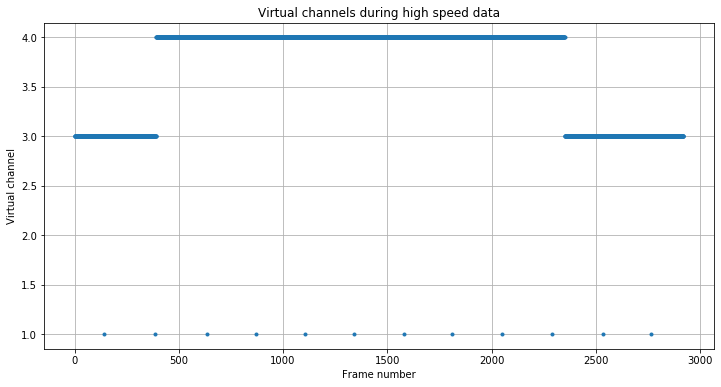

In [9]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot([a.primary_header.virtual_channel_id for a in aos if a.primary_header.virtual_channel_id in vcs], '.')
plt.title('Virtual channels during high speed data')
plt.xlabel('Frame number')
plt.ylabel('Virtual channel')
plt.grid()

## Virtual channel 1

In [10]:
[a.primary_header for a in aos_by_vc[1]]

[Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=1, virtual_channel_frame_count=629644, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=1, virtual_channel_frame_count=629645, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=1, virtual_channel_frame_count=629646, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=1, virtual_channel_frame_count=629647, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=1, virtual_channel_frame_count=629648, replay_flag=False, vc_frame_count_u

In [11]:
vc1_packets = list(ccsds.extract_space_packets(aos_by_vc[1], 245, 1))
vc1_sp_headers = [ccsds.SpacePacketPrimaryHeader.parse(p) for p in vc1_packets]
vc1_apids = collections.Counter([p.APID for p in vc1_sp_headers])
vc1_apids

Counter({1280: 12,
         449: 12,
         2: 12,
         3: 12,
         14: 12,
         1283: 6,
         192: 6,
         452: 3,
         454: 6,
         451: 6,
         8: 6,
         194: 6,
         196: 6,
         672: 3,
         457: 6,
         448: 6,
         1027: 1,
         461: 6,
         458: 6,
         198: 6,
         1541: 1,
         1536: 6,
         456: 6,
         455: 6,
         1281: 6,
         1282: 6,
         1024: 6,
         1025: 6,
         768: 6,
         832: 6,
         460: 6,
         1284: 6,
         450: 6,
         462: 6,
         1285: 1,
         704: 3,
         736: 3,
         204: 3,
         206: 3,
         208: 3,
         210: 3,
         212: 3,
         214: 3,
         200: 2,
         1537: 3,
         1542: 1,
         202: 1,
         1344: 1,
         1286: 1,
         1287: 1,
         1360: 1,
         1026: 1,
         1538: 1,
         1288: 1,
         1539: 1})

In [12]:
vc1_timestamps = get_timestamps(aos_by_vc[1])
vc1_timestamps

array(['2020-07-30T00:44:58.880200', '2020-07-30T00:44:59.880200',
       '2020-07-30T00:45:00.888100', '2020-07-30T00:45:01.888400',
       '2020-07-30T00:45:02.884400', '2020-07-30T00:45:03.888300',
       '2020-07-30T00:45:04.884300', '2020-07-30T00:45:05.884200',
       '2020-07-30T00:45:06.884400', '2020-07-30T00:45:07.884300',
       '2020-07-30T00:45:08.884300', '2020-07-30T00:45:09.880200'],
      dtype='datetime64[us]')

## Virtual channel 3

In [13]:
[a.primary_header for a in aos_by_vc[3][:5]]

[Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=3, virtual_channel_frame_count=119119, replay_flag=False, vc_frame_count_usage_flag=True, rsvd_spare=1, vc_framecount_cycle=5),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=3, virtual_channel_frame_count=119120, replay_flag=False, vc_frame_count_usage_flag=True, rsvd_spare=1, vc_framecount_cycle=5),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=3, virtual_channel_frame_count=119121, replay_flag=False, vc_frame_count_usage_flag=True, rsvd_spare=1, vc_framecount_cycle=5),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=3, virtual_channel_frame_count=119122, replay_flag=False, vc_frame_count_usage_flag=True, rsvd_spare=1, vc_framecount_cycle=5),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=3, virtual_channel_frame_count=119123, replay_flag=False, vc_frame_count_usage

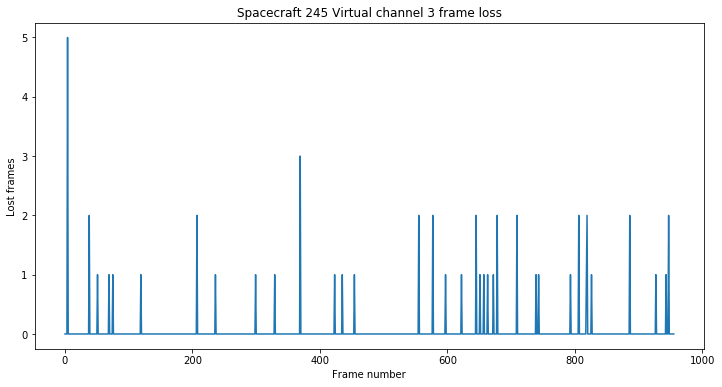

In [14]:
fc = np.array([a.primary_header.virtual_channel_frame_count for a in aos_by_vc[3]])

plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(np.diff(fc) - 1)
plt.title('Spacecraft 245 Virtual channel 3 frame loss')
plt.ylabel('Lost frames')
plt.xlabel('Frame number');

In [15]:
vc3_frames = np.array([f for f,a in zip(frames, aos) if
                            a.primary_header.virtual_channel_id == 3])
np.unique(vc3_frames[:,5:12])

array([85], dtype=uint8)

In [16]:
hex(85)

'0x55'

In [56]:
np.unique(vc3_frames[:,12])

array([122], dtype=uint8)

In [64]:
hex(122)

'0x7a'

In [19]:
np.unique(vc3_frames[:,13])

array([170], dtype=uint8)

In [20]:
hex(170)

'0xaa'

In [21]:
np.unique(vc3_frames[:,14:])

array([85], dtype=uint8)

In [22]:
hex(aos_by_vc[3][0].insert_zone.unknown)

'0x7aaa'

## Virtual channel 4

In [23]:
[a.primary_header for a in aos_by_vc[4][:5]]

[Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=4, virtual_channel_frame_count=625665, replay_flag=True, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=4, virtual_channel_frame_count=625666, replay_flag=True, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=4, virtual_channel_frame_count=625667, replay_flag=True, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=4, virtual_channel_frame_count=625668, replay_flag=True, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=4, virtual_channel_frame_count=625669, replay_flag=True, vc_frame_count_usage_

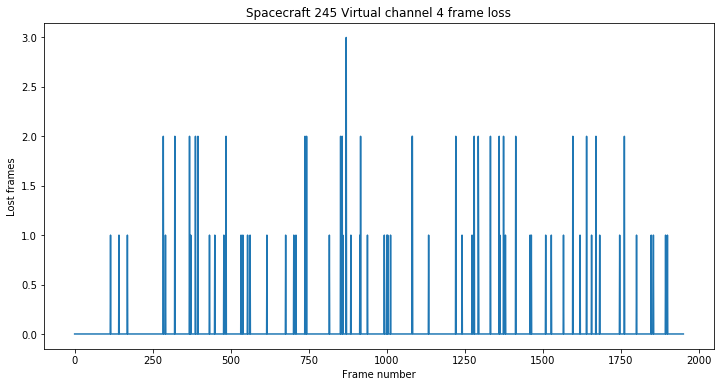

In [24]:
fc = np.array([a.primary_header.virtual_channel_frame_count for a in aos_by_vc[4]])

plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(np.diff(fc) - 1)
plt.title('Spacecraft 245 Virtual channel 4 frame loss')
plt.ylabel('Lost frames')
plt.xlabel('Frame number');

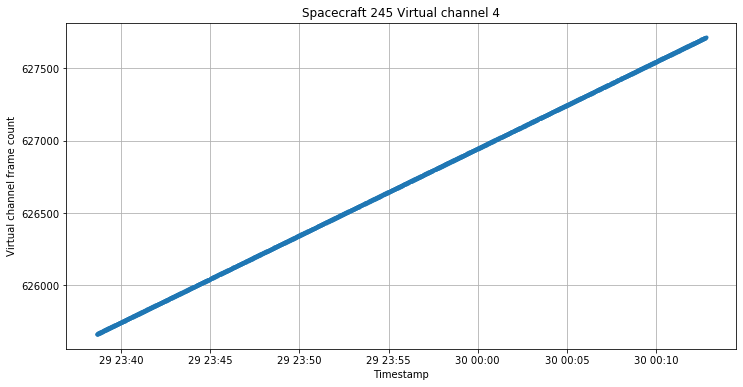

In [25]:
vc4_timestamps = get_timestamps(aos_by_vc[4])

plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(vc4_timestamps, fc, '.')
plt.title('Spacecraft 245 Virtual channel 4')
plt.xlabel('Timestamp')
plt.ylabel('Virtual channel frame count')
plt.grid();

In [26]:
vc4_timestamps[:10]

array(['2020-07-29T23:38:39.305600', '2020-07-29T23:38:40.305600',
       '2020-07-29T23:38:41.305600', '2020-07-29T23:38:42.305600',
       '2020-07-29T23:38:43.305600', '2020-07-29T23:38:44.305600',
       '2020-07-29T23:38:45.305600', '2020-07-29T23:38:46.305600',
       '2020-07-29T23:38:47.305600', '2020-07-29T23:38:48.305600'],
      dtype='datetime64[us]')

In [27]:
{hex(a.insert_zone.unknown) for a in aos_by_vc[4]}

{'0x7aaa'}

In [28]:
vc4_packets = list(ccsds.extract_space_packets(aos_by_vc[4], 245, 4, get_timestamps = True))

/home/daniel/jupyter_notebooks/Tianwen/ccsds.py:79: UserWarning: [Space Packet extractor Spacecraft 245 VC 4] Broken stream. Last frame count 625780, current frame count 625782
  warnings.warn(f'[Space Packet extractor Spacecraft {sc_id} VC {virtual_channel}] Broken stream. Last frame count {frame_count}, current frame count {frame_count_new}')
/home/daniel/jupyter_notebooks/Tianwen/ccsds.py:79: UserWarning: [Space Packet extractor Spacecraft 245 VC 4] Broken stream. Last frame count 625808, current frame count 625810
  warnings.warn(f'[Space Packet extractor Spacecraft {sc_id} VC {virtual_channel}] Broken stream. Last frame count {frame_count}, current frame count {frame_count_new}')
/home/daniel/jupyter_notebooks/Tianwen/ccsds.py:79: UserWarning: [Space Packet extractor Spacecraft 245 VC 4] Broken stream. Last frame count 625836, current frame count 625838
  warnings.warn(f'[Space Packet extractor Spacecraft {sc_id} VC {virtual_channel}] Broken stream. Last frame count {frame_count},

/home/daniel/jupyter_notebooks/Tianwen/ccsds.py:79: UserWarning: [Space Packet extractor Spacecraft 245 VC 4] Broken stream. Last frame count 626513, current frame count 626515
  warnings.warn(f'[Space Packet extractor Spacecraft {sc_id} VC {virtual_channel}] Broken stream. Last frame count {frame_count}, current frame count {frame_count_new}')
/home/daniel/jupyter_notebooks/Tianwen/ccsds.py:79: UserWarning: [Space Packet extractor Spacecraft 245 VC 4] Broken stream. Last frame count 626550, current frame count 626553
  warnings.warn(f'[Space Packet extractor Spacecraft {sc_id} VC {virtual_channel}] Broken stream. Last frame count {frame_count}, current frame count {frame_count_new}')
/home/daniel/jupyter_notebooks/Tianwen/ccsds.py:79: UserWarning: [Space Packet extractor Spacecraft 245 VC 4] Broken stream. Last frame count 626557, current frame count 626560
  warnings.warn(f'[Space Packet extractor Spacecraft {sc_id} VC {virtual_channel}] Broken stream. Last frame count {frame_count},

/home/daniel/jupyter_notebooks/Tianwen/ccsds.py:79: UserWarning: [Space Packet extractor Spacecraft 245 VC 4] Broken stream. Last frame count 627150, current frame count 627153
  warnings.warn(f'[Space Packet extractor Spacecraft {sc_id} VC {virtual_channel}] Broken stream. Last frame count {frame_count}, current frame count {frame_count_new}')
/home/daniel/jupyter_notebooks/Tianwen/ccsds.py:79: UserWarning: [Space Packet extractor Spacecraft 245 VC 4] Broken stream. Last frame count 627198, current frame count 627200
  warnings.warn(f'[Space Packet extractor Spacecraft {sc_id} VC {virtual_channel}] Broken stream. Last frame count {frame_count}, current frame count {frame_count_new}')
/home/daniel/jupyter_notebooks/Tianwen/ccsds.py:79: UserWarning: [Space Packet extractor Spacecraft 245 VC 4] Broken stream. Last frame count 627203, current frame count 627205
  warnings.warn(f'[Space Packet extractor Spacecraft {sc_id} VC {virtual_channel}] Broken stream. Last frame count {frame_count},

In [29]:
vc4_sp_headers = [ccsds.SpacePacketPrimaryHeader.parse(p[0]) for p in vc4_packets]

In [30]:
vc4_apids = collections.Counter([p.APID for p in vc4_sp_headers])
for apid in sorted(vc4_apids):
    print(f'{apid}: {vc4_apids[apid]}')

2: 1952
3: 1952
8: 976
14: 1952
192: 976
194: 976
196: 976
198: 976
200: 237
202: 245
204: 483
206: 483
208: 483
210: 483
212: 483
214: 483
448: 976
449: 1952
450: 976
451: 976
452: 493
454: 976
455: 976
456: 976
457: 976
458: 976
460: 976
461: 976
462: 976
672: 493
704: 483
736: 483
768: 976
832: 976
1024: 976
1025: 976
1026: 125
1027: 123
1028: 120
1280: 1952
1281: 976
1282: 976
1283: 976
1284: 976
1285: 111
1286: 114
1287: 120
1288: 117
1344: 245
1360: 249
1536: 976
1537: 494
1538: 125
1539: 120
1540: 121
1541: 115
1542: 115


In [31]:
vc4_by_apid = {apid : [p for h,p in zip(vc4_sp_headers, vc4_packets)
                           if h.APID == apid] for apid in vc4_apids}

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


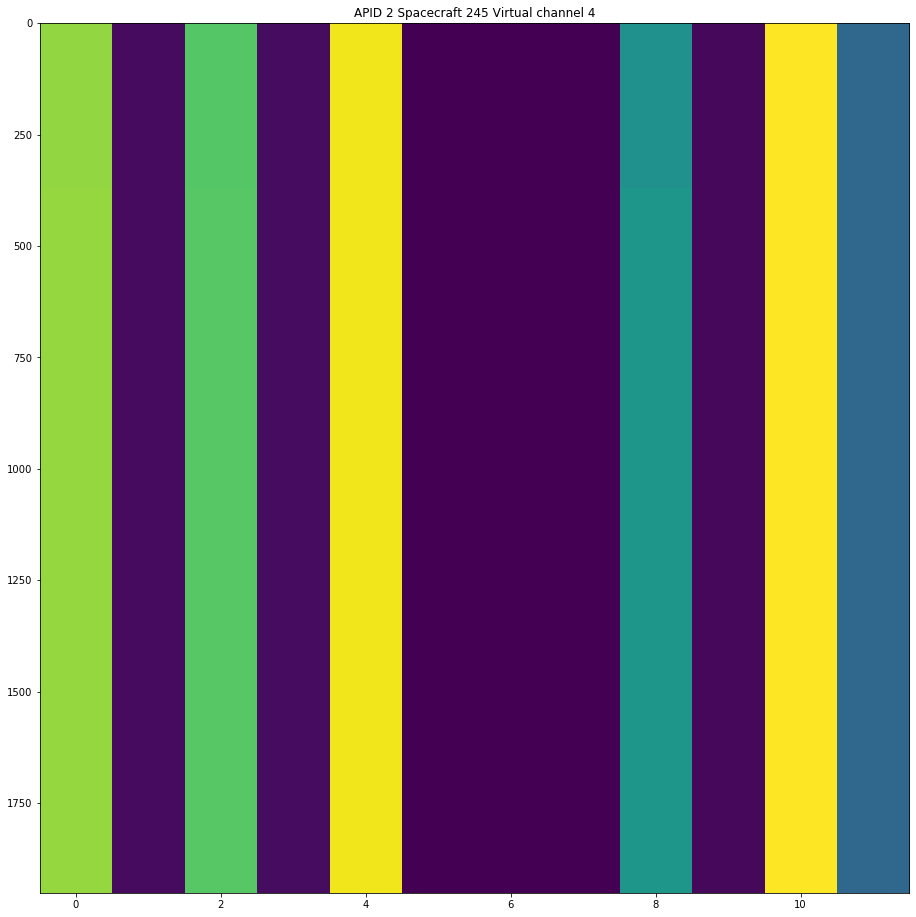

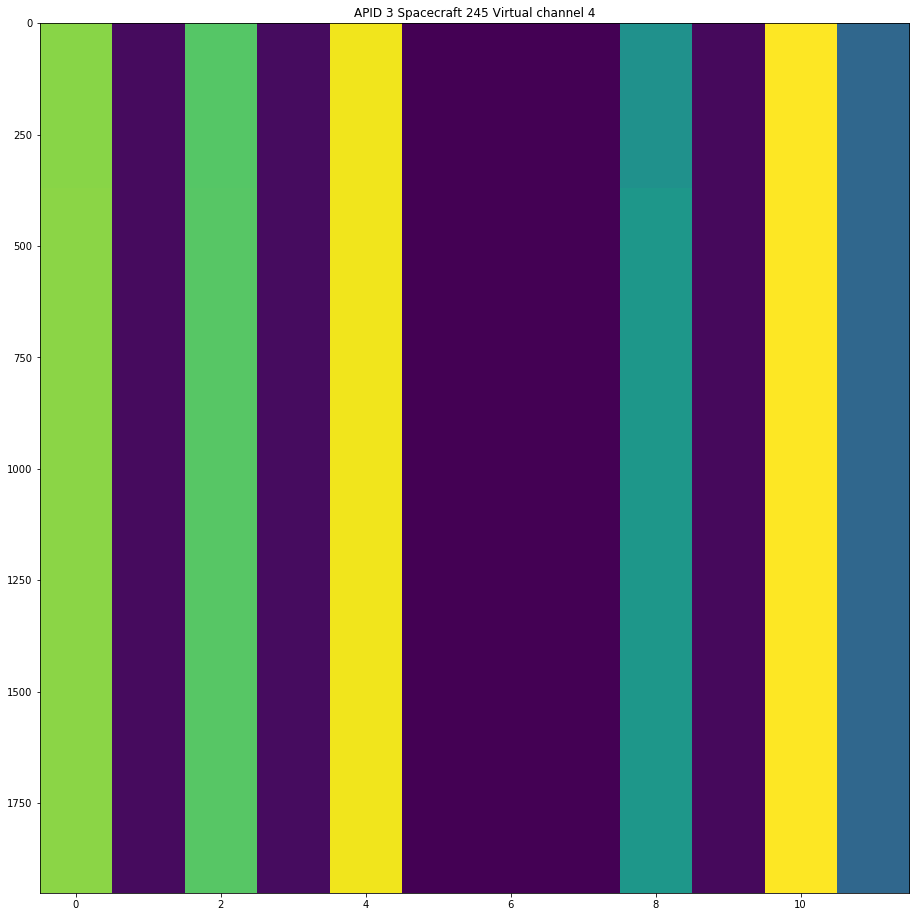

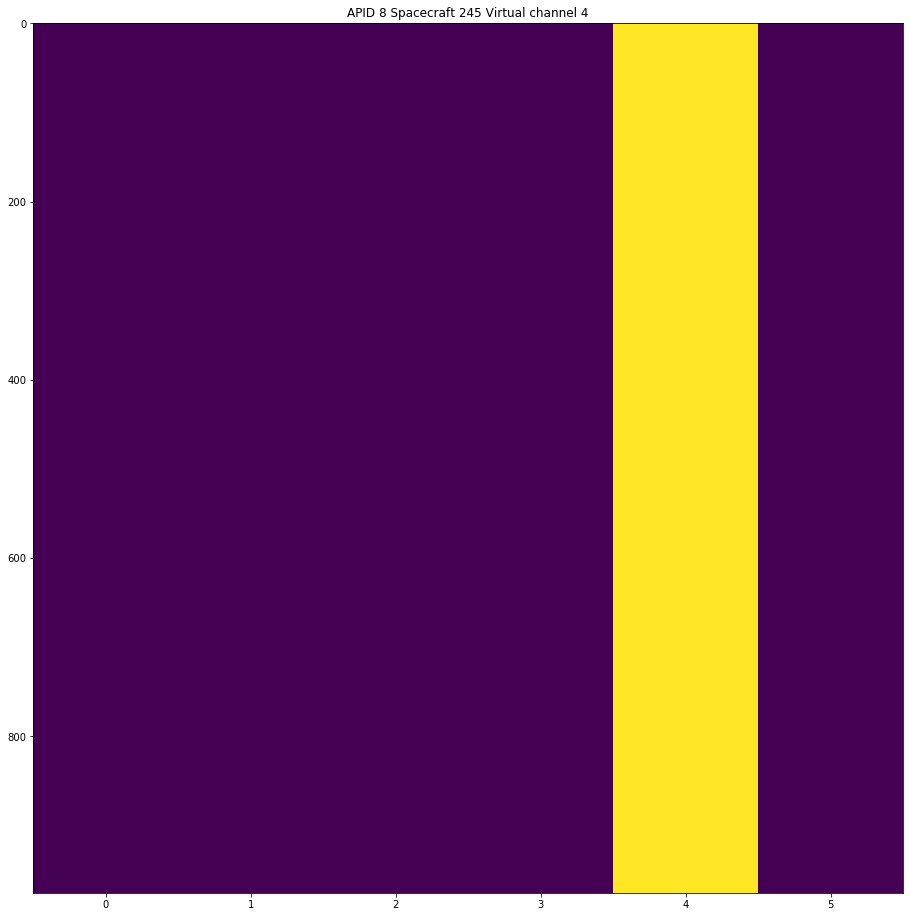

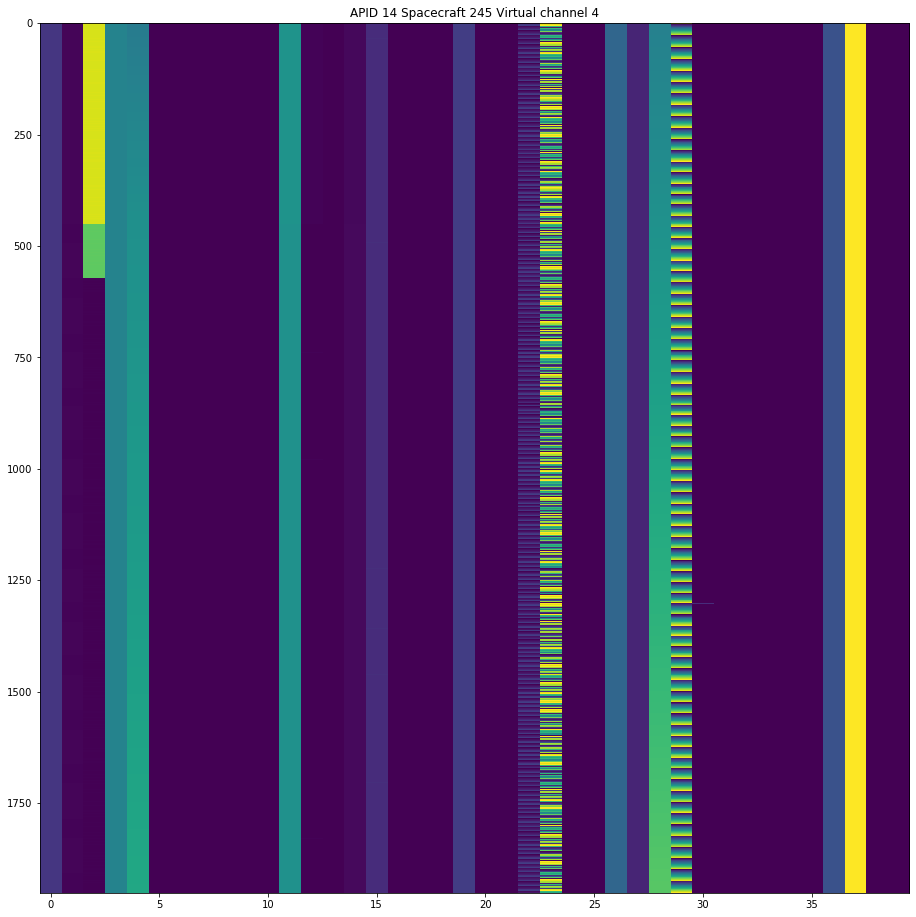

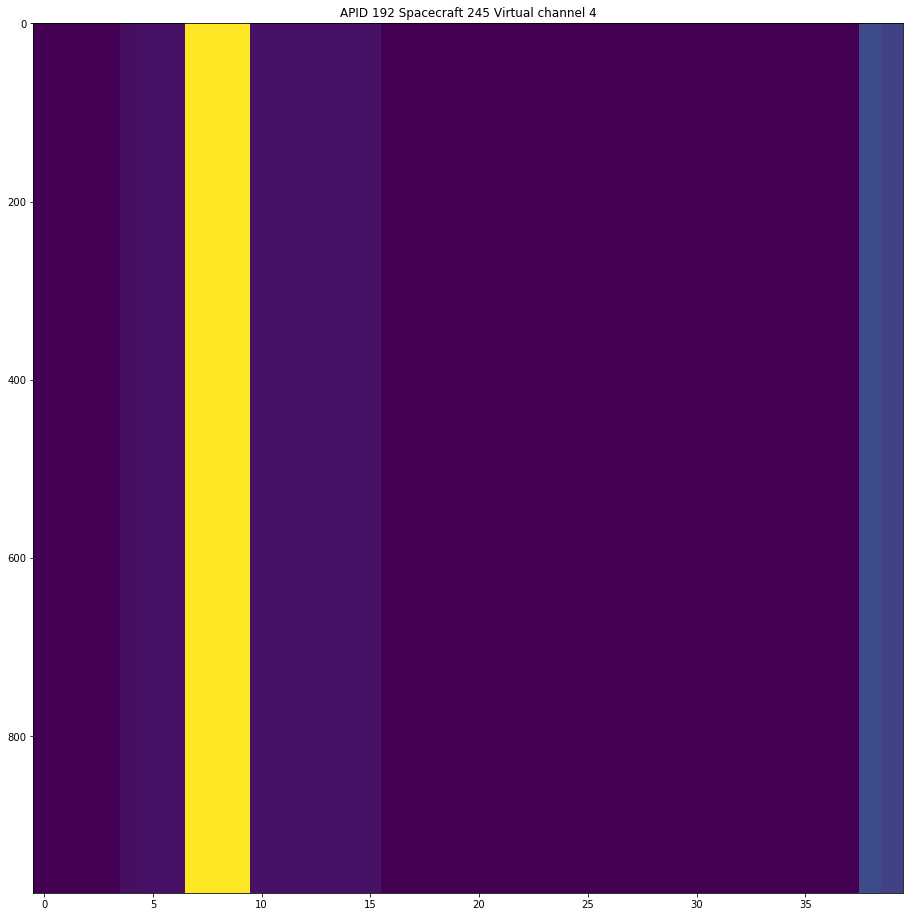

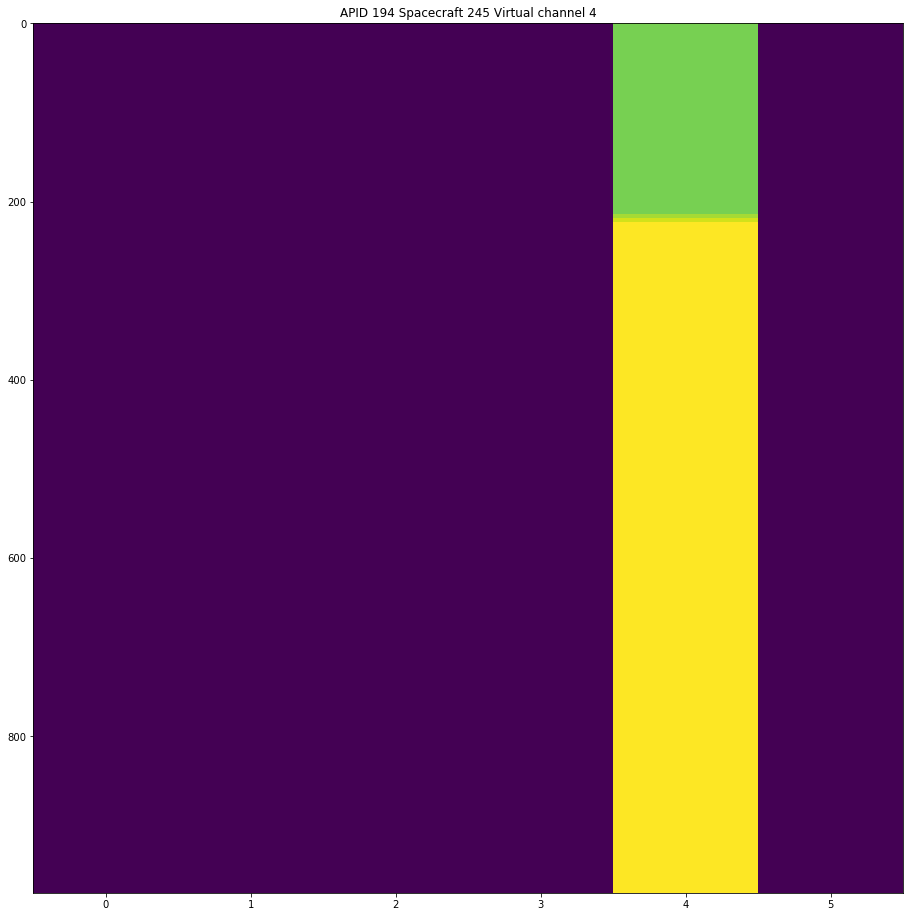

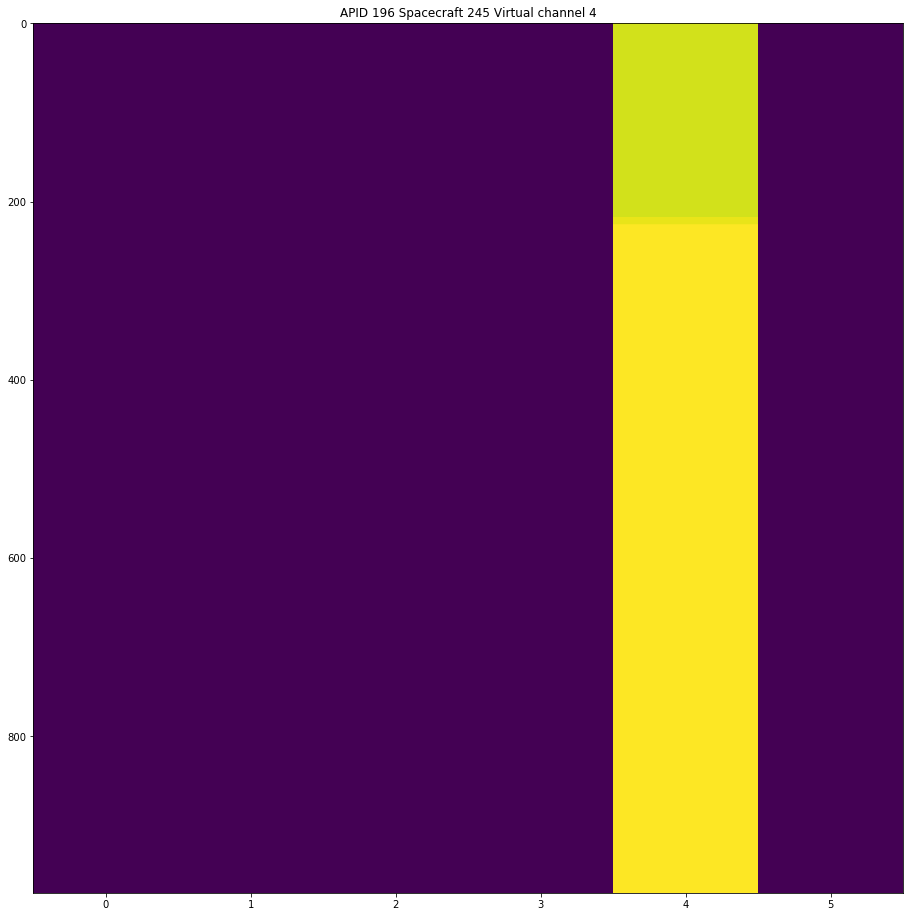

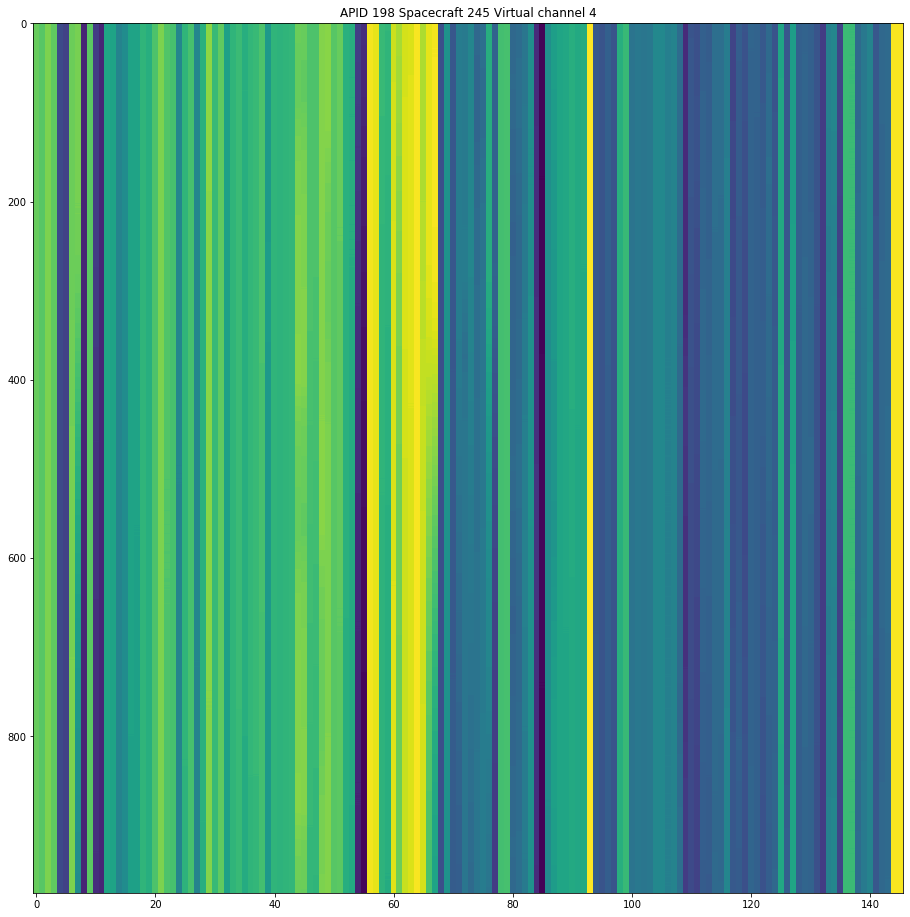

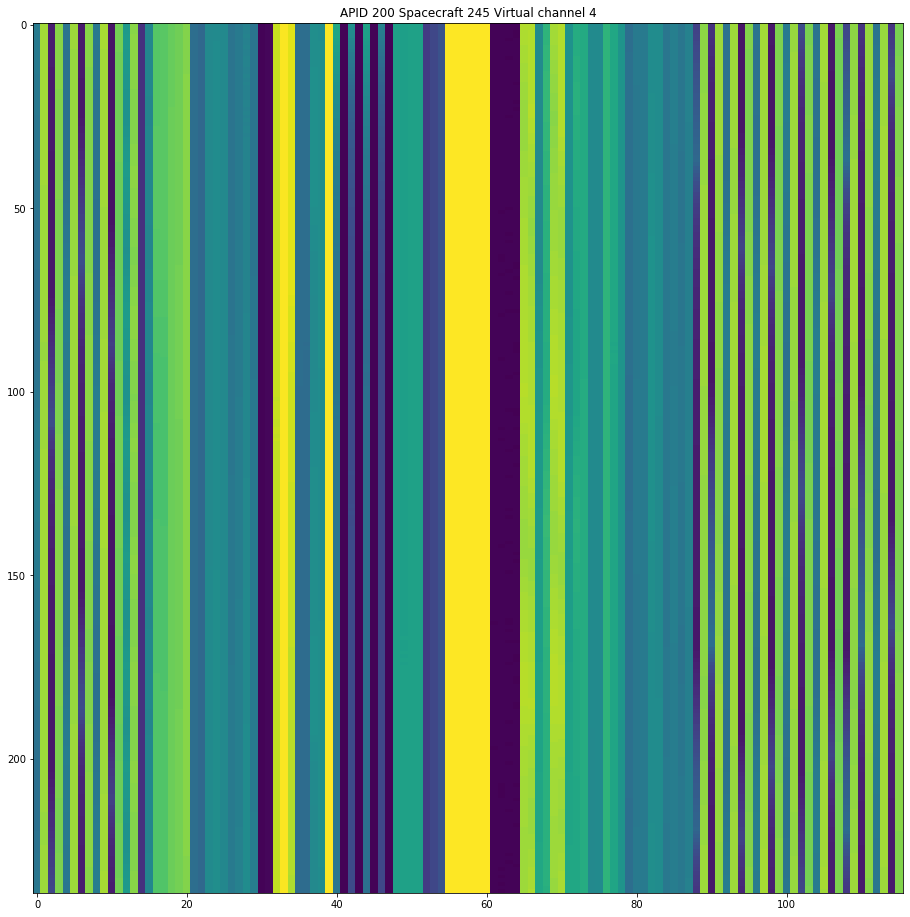

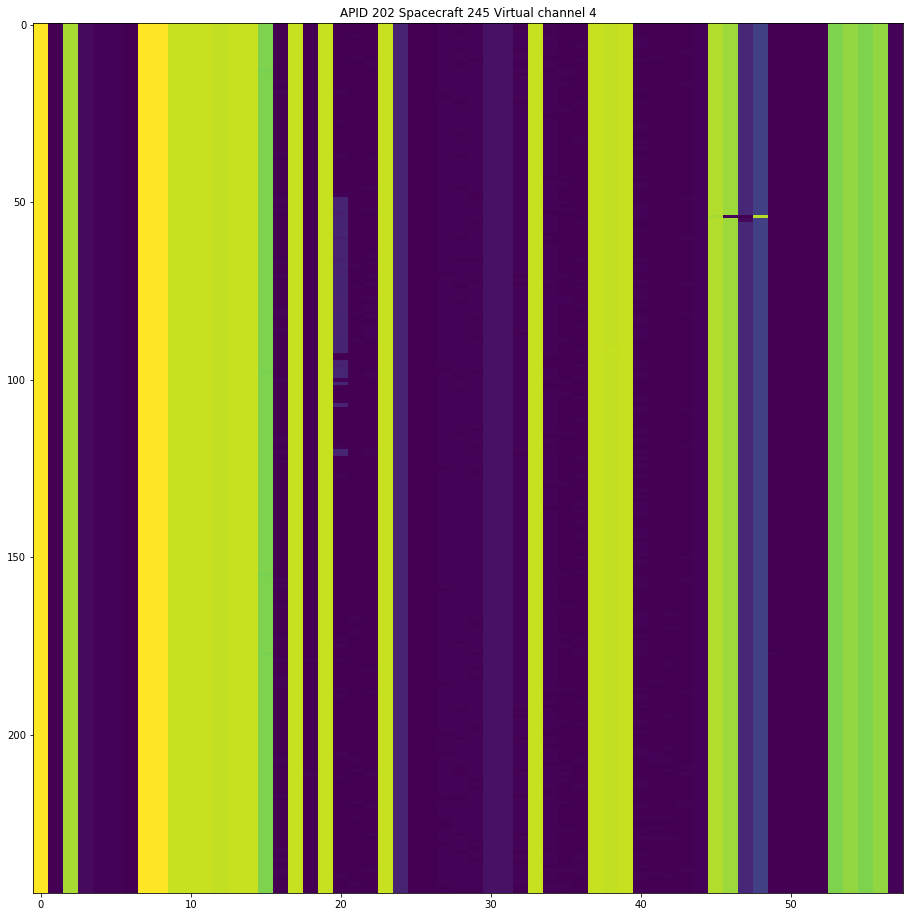

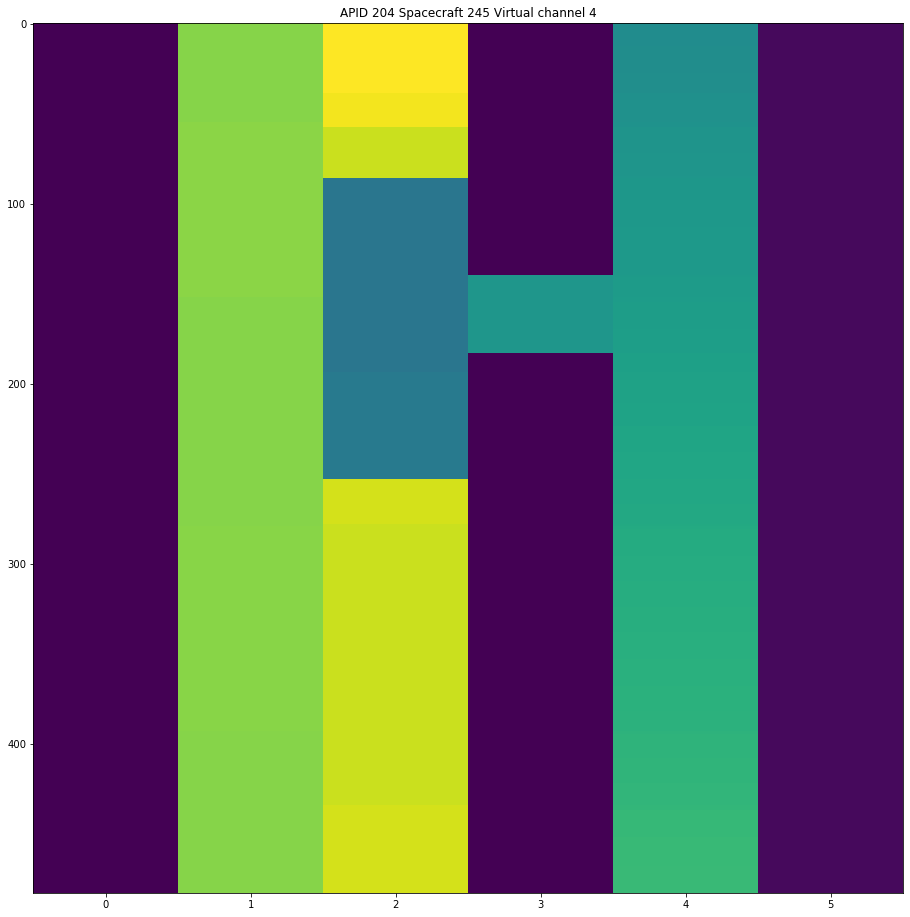

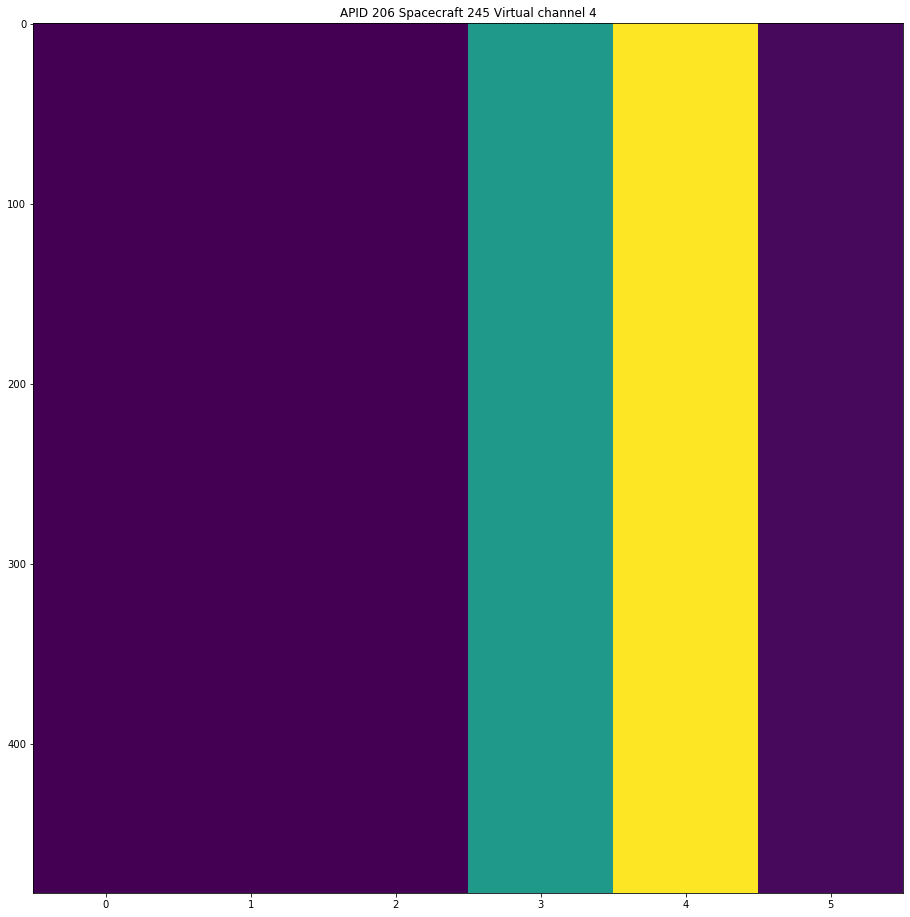

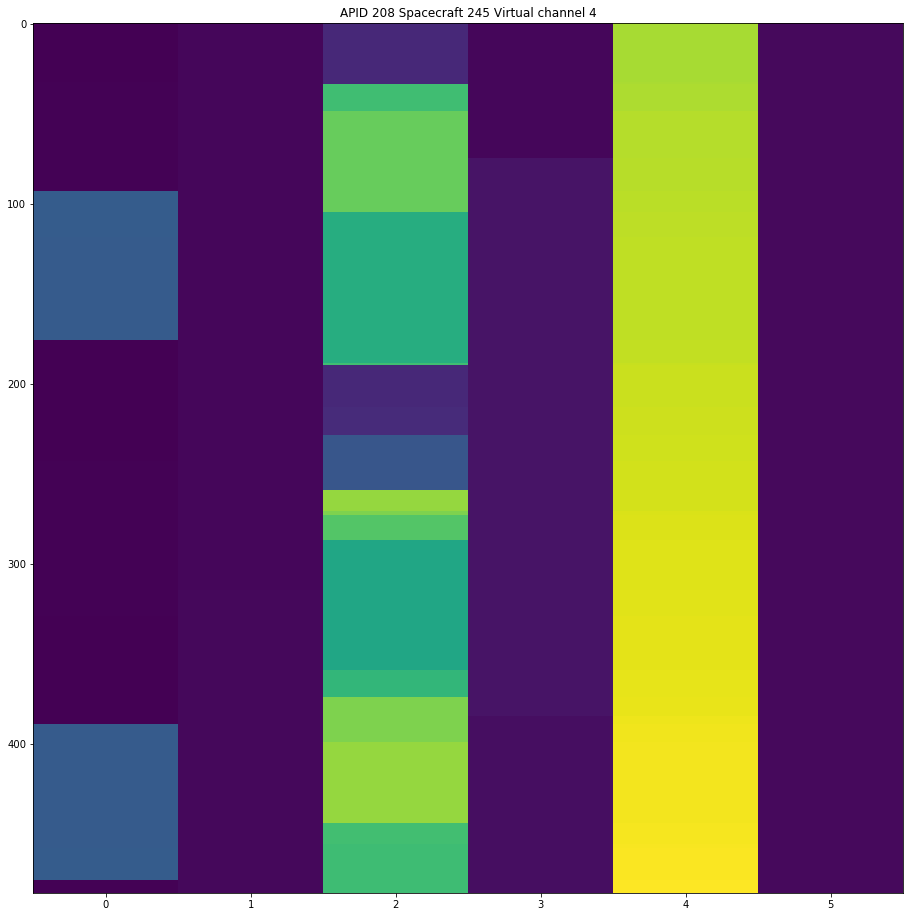

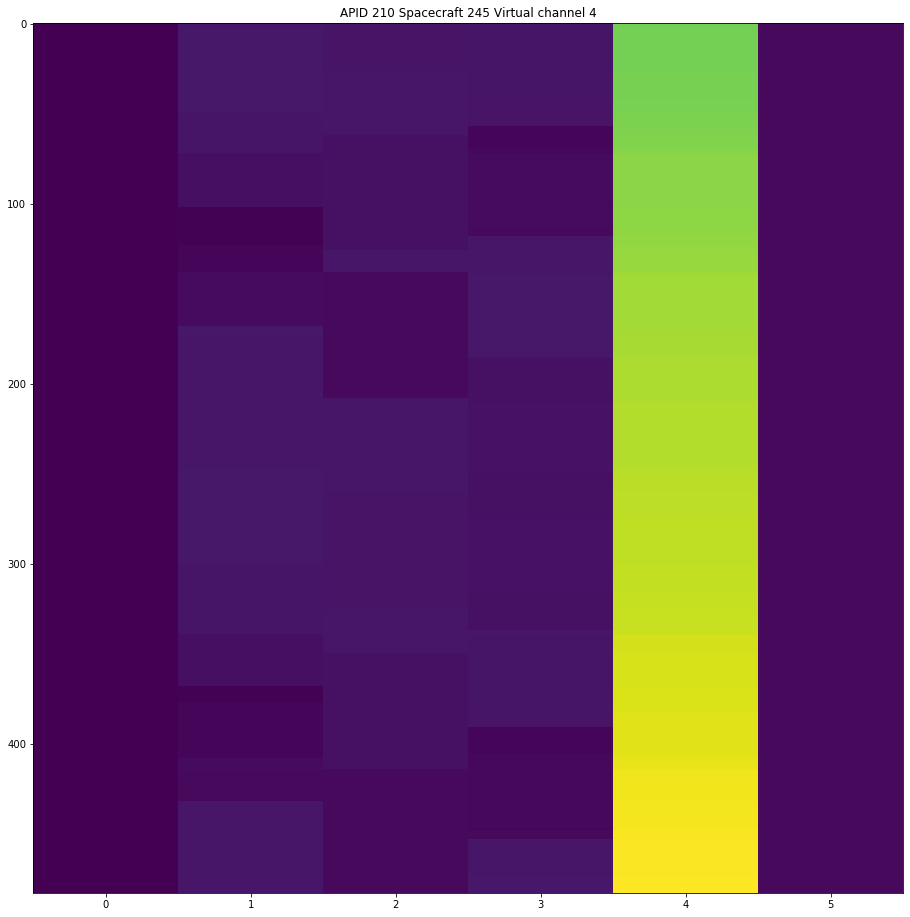

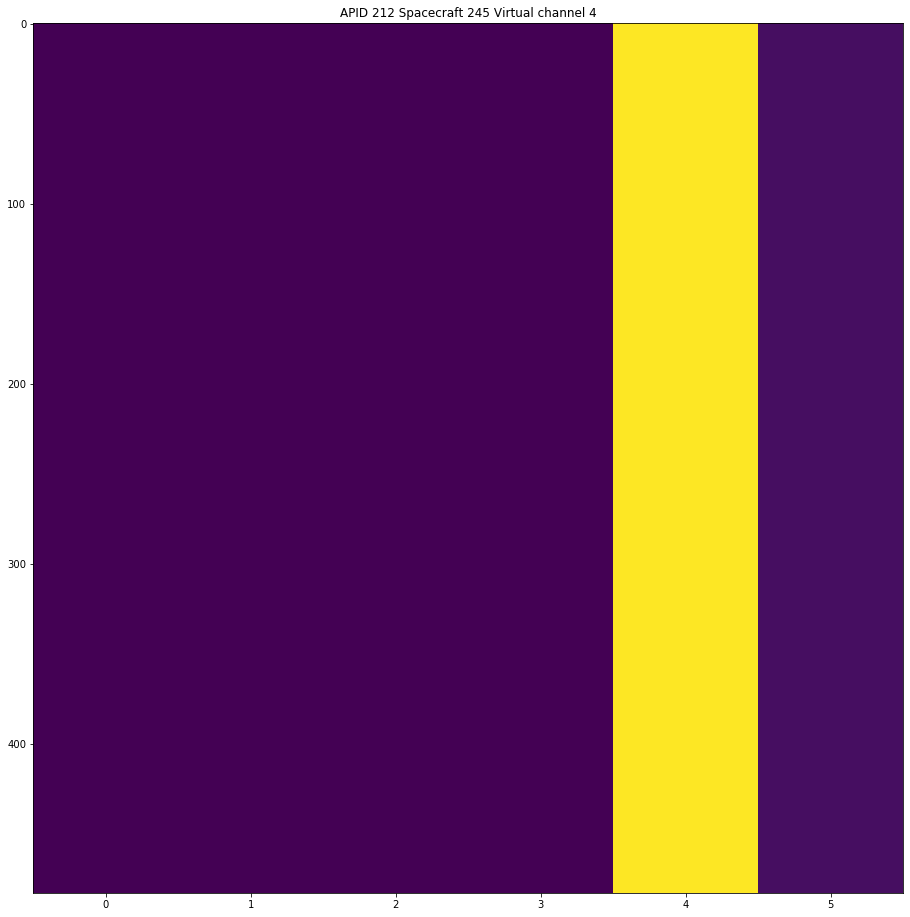

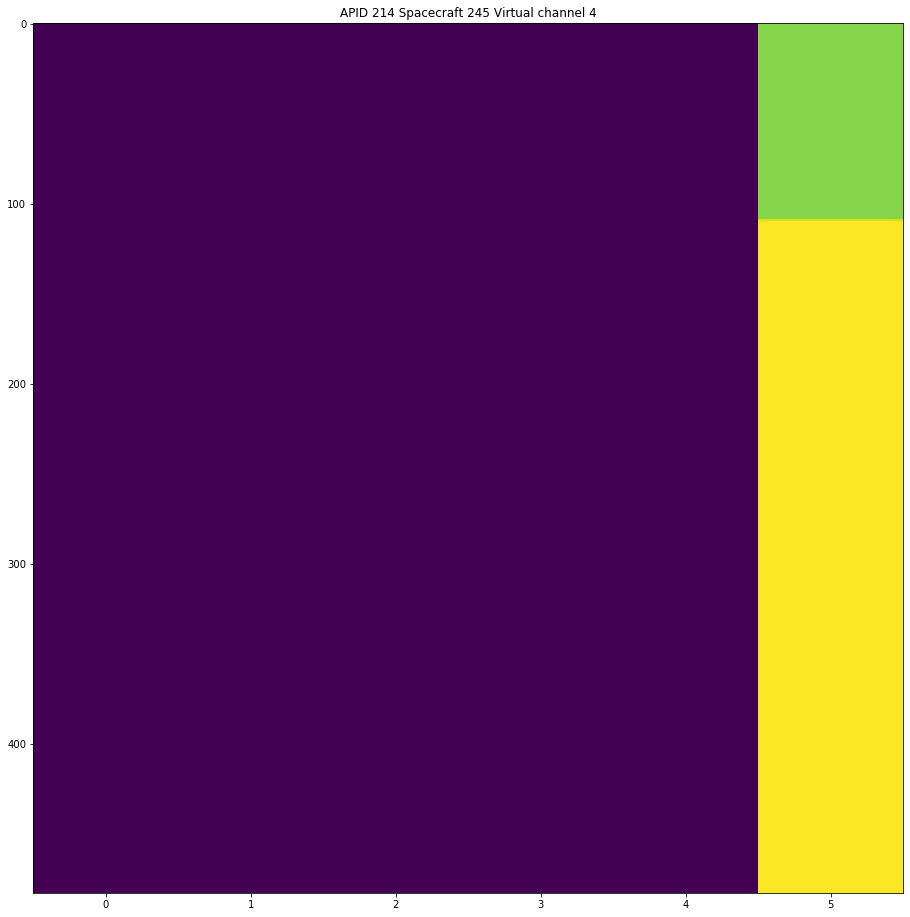

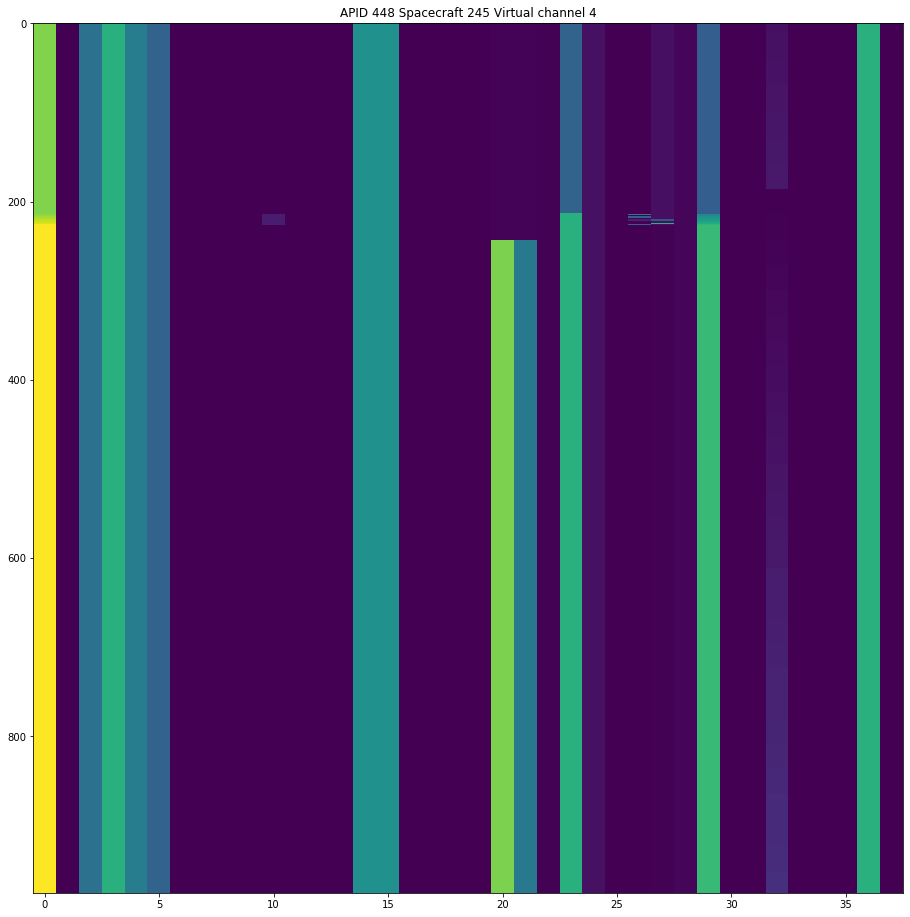

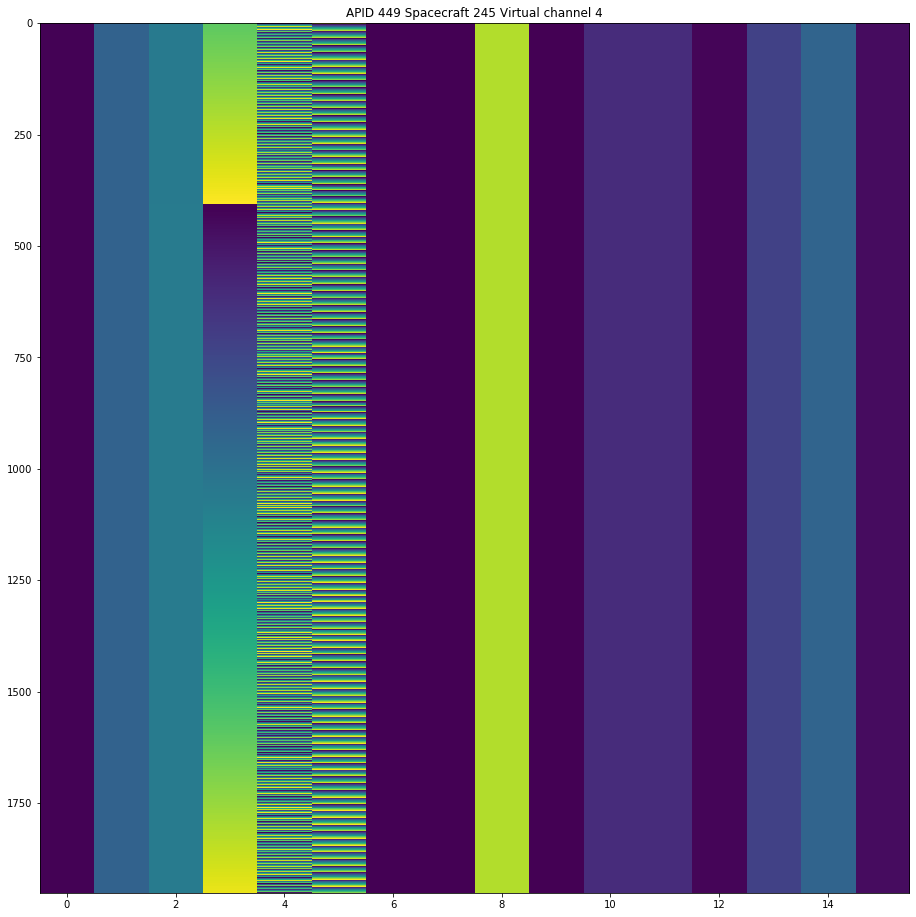

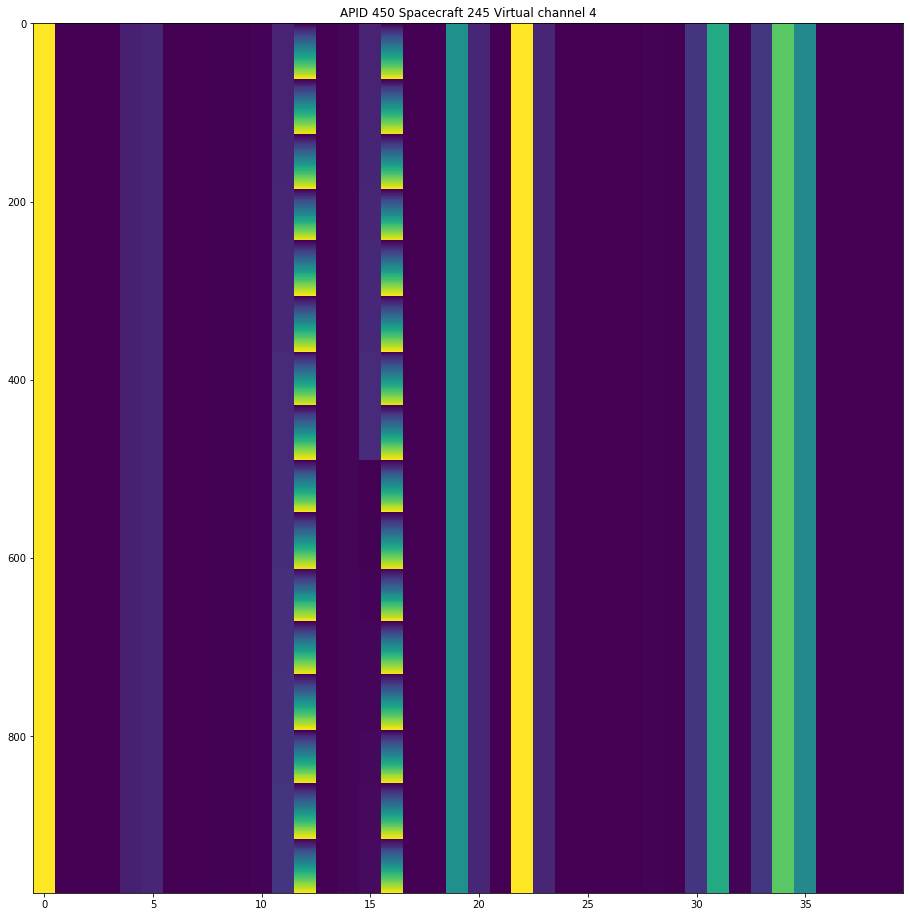

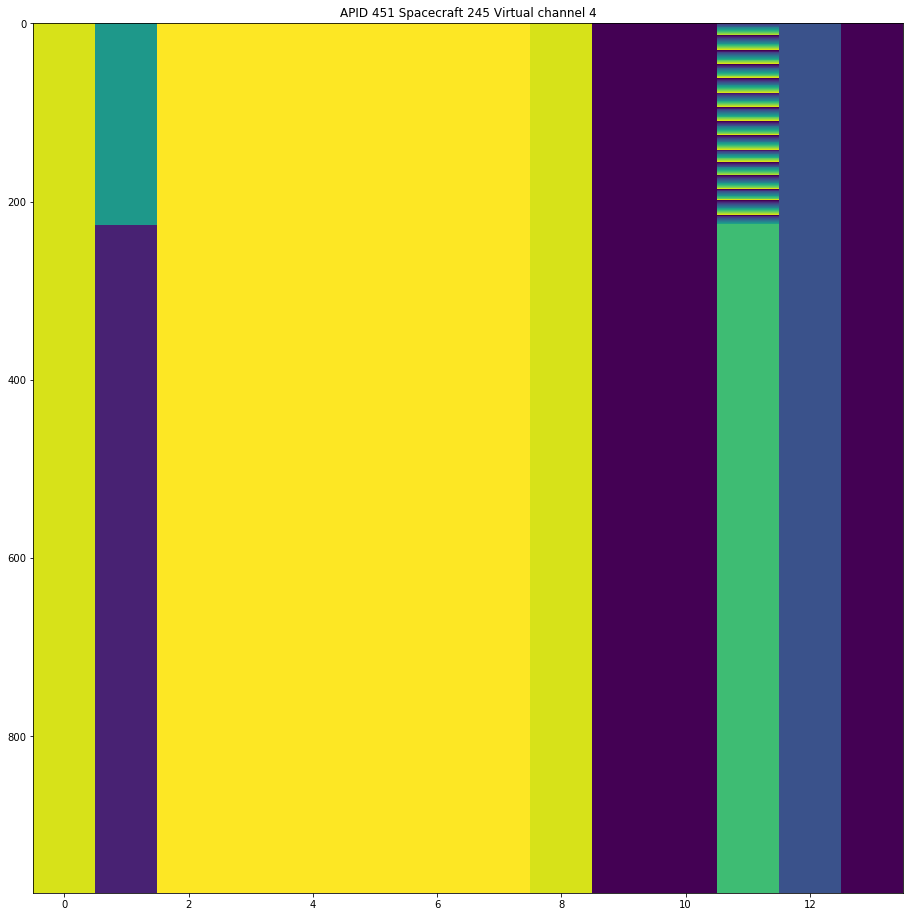

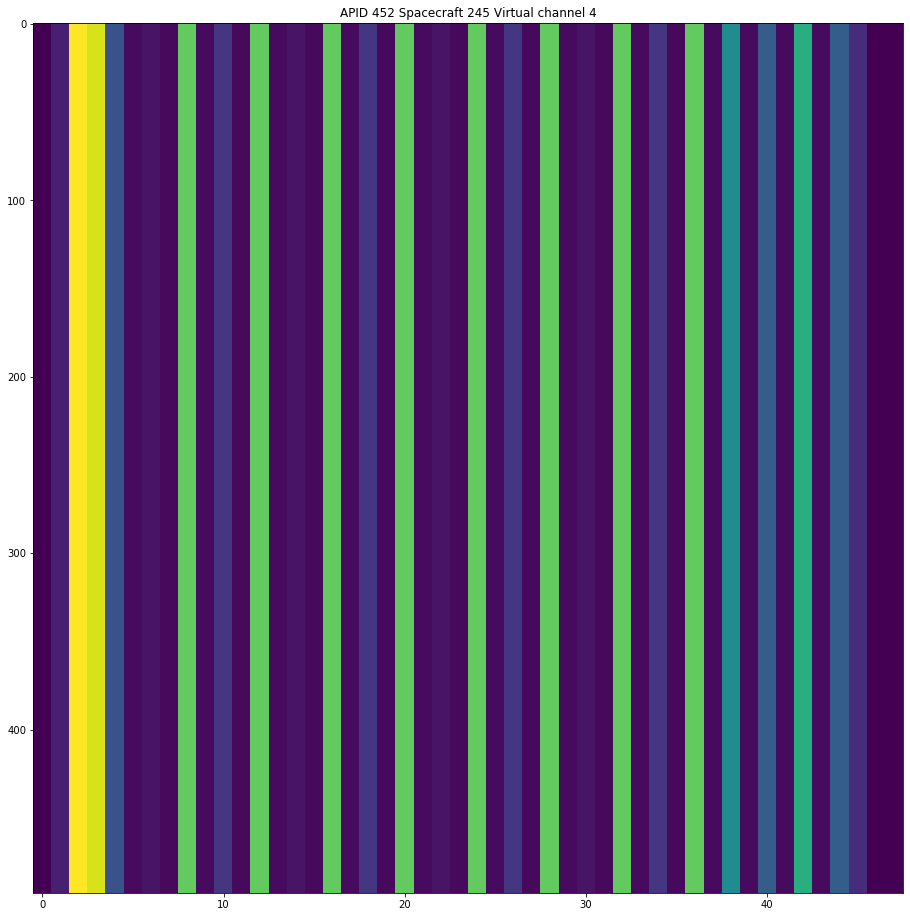

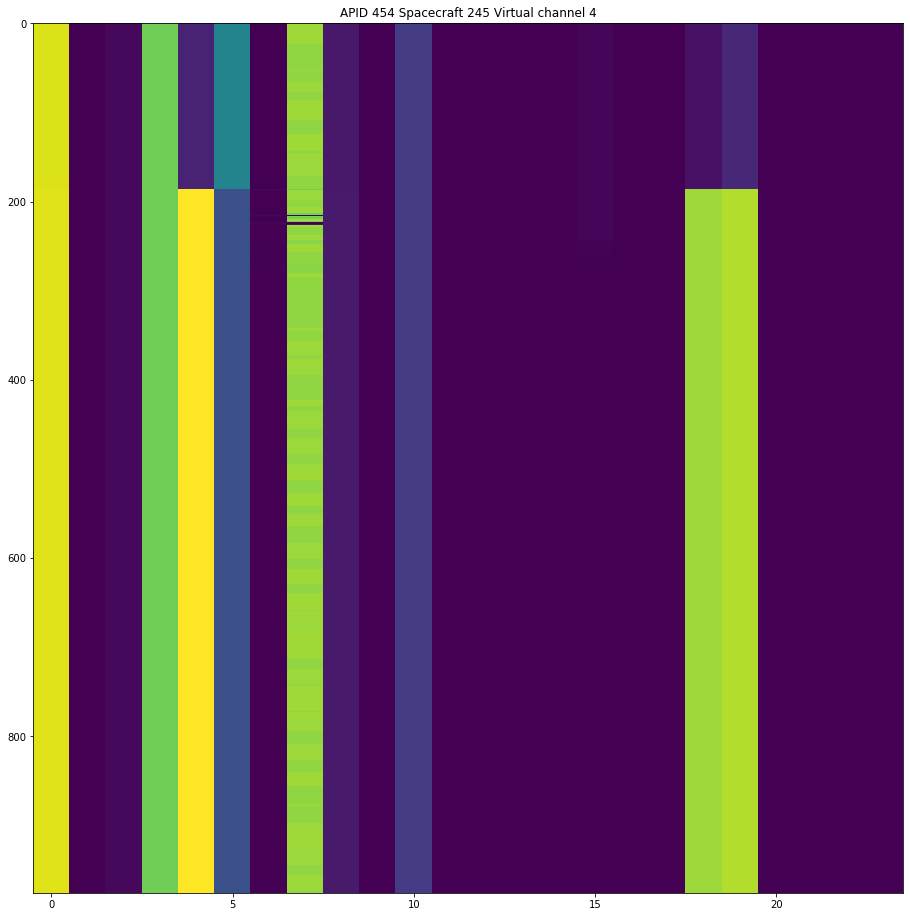

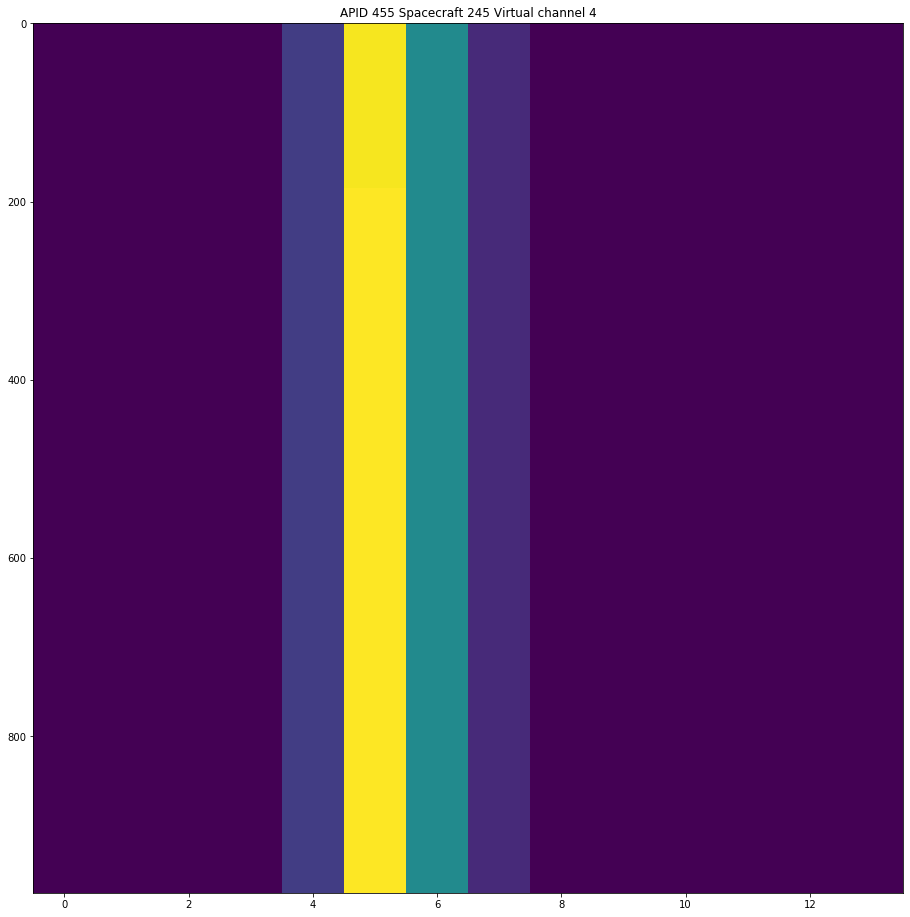

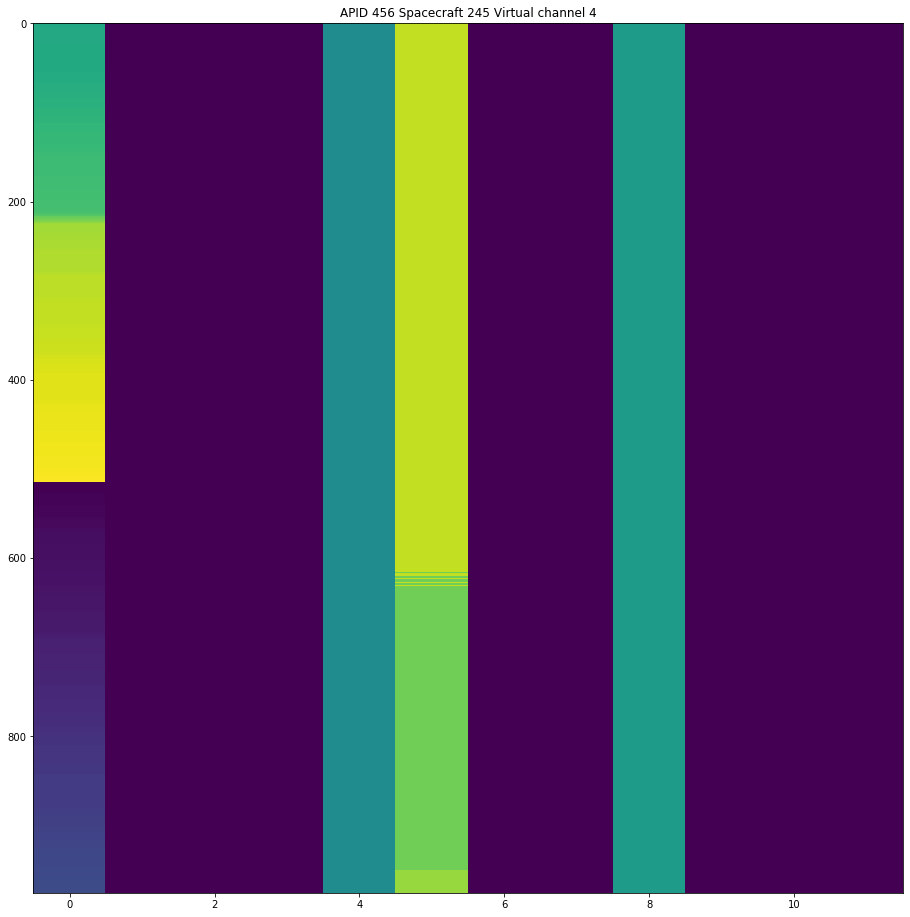

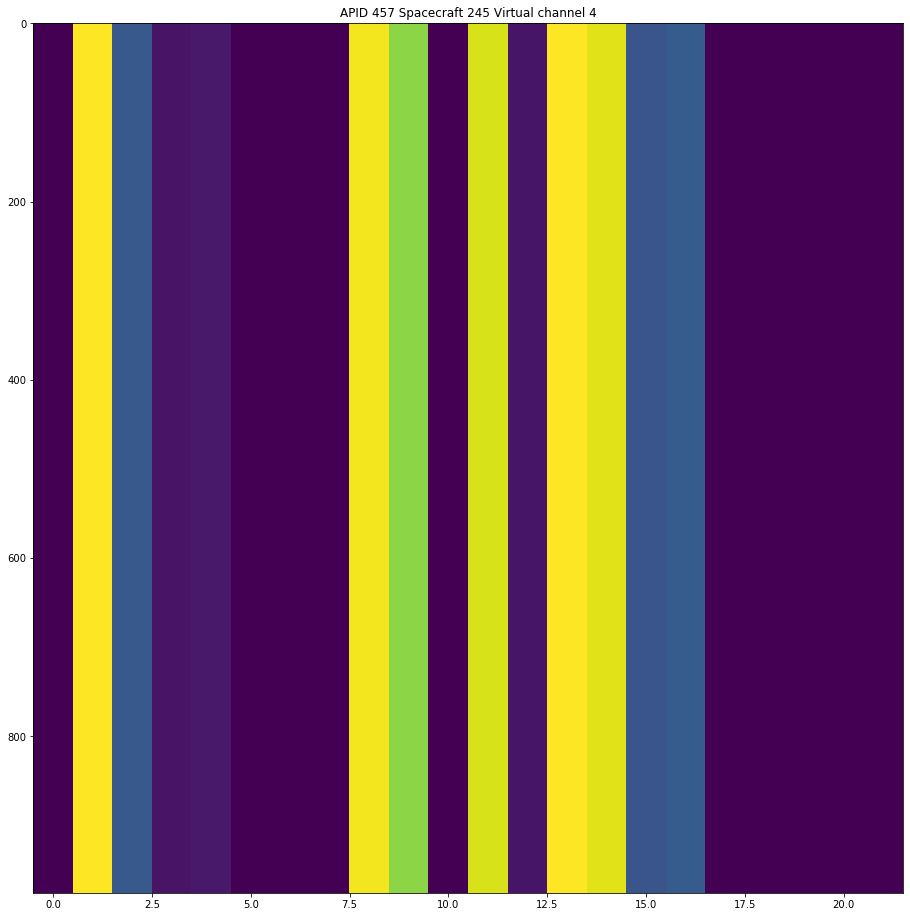

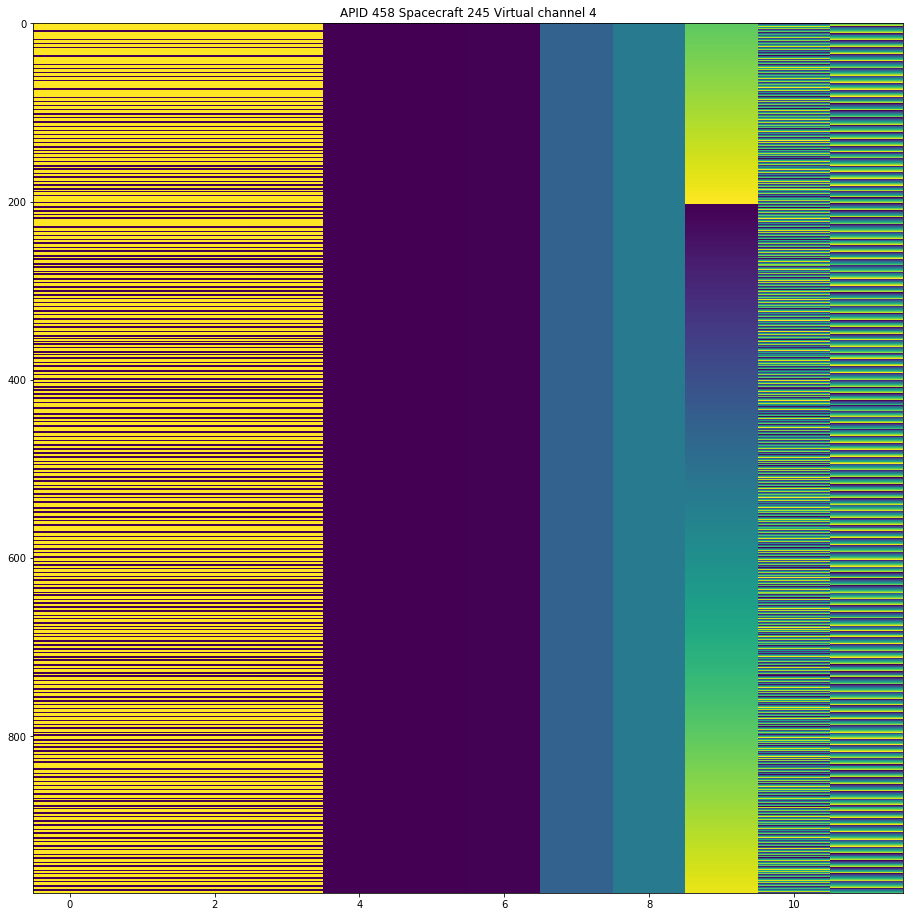

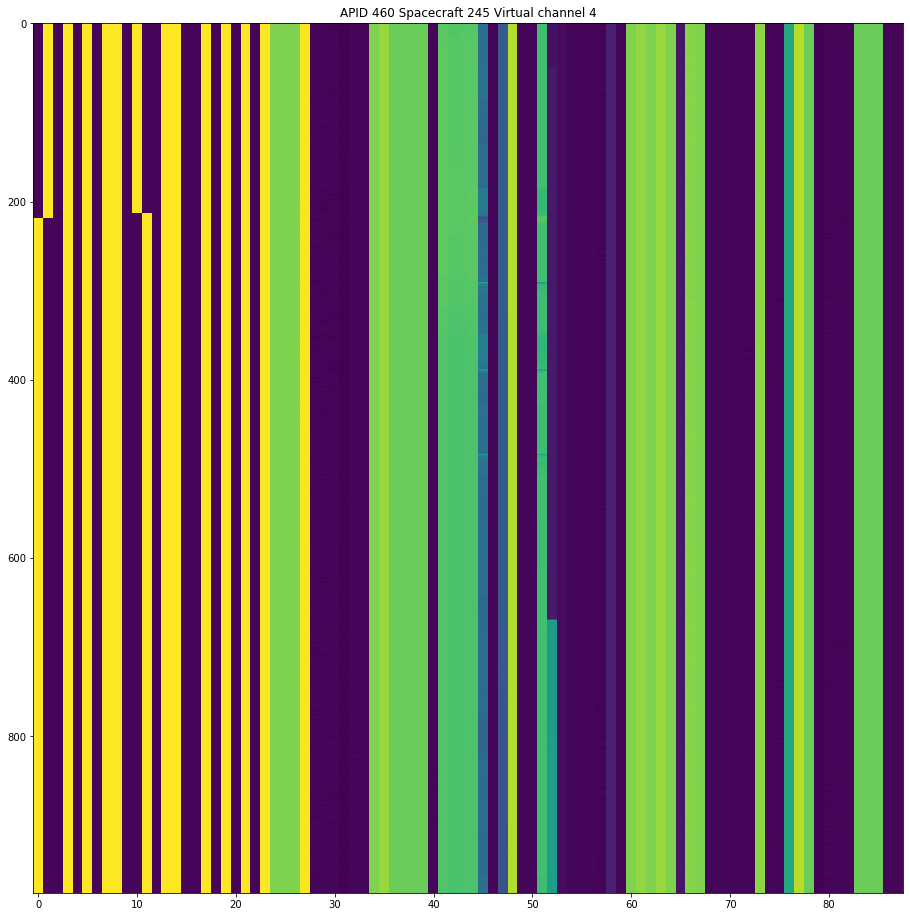

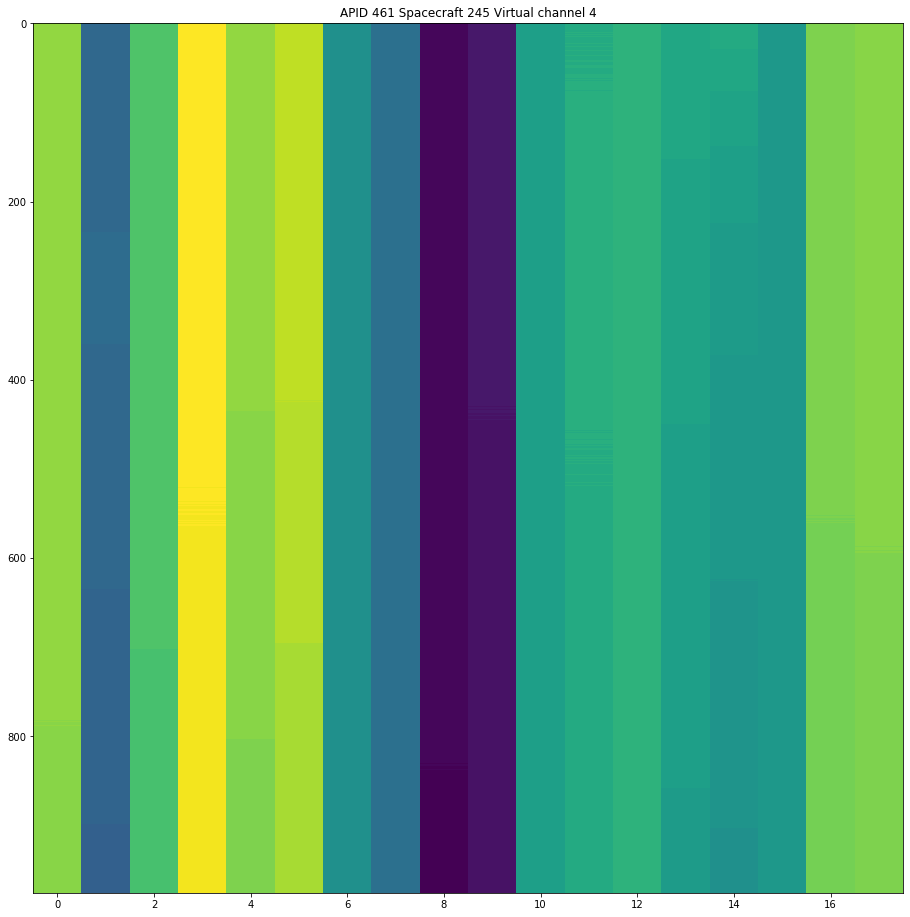

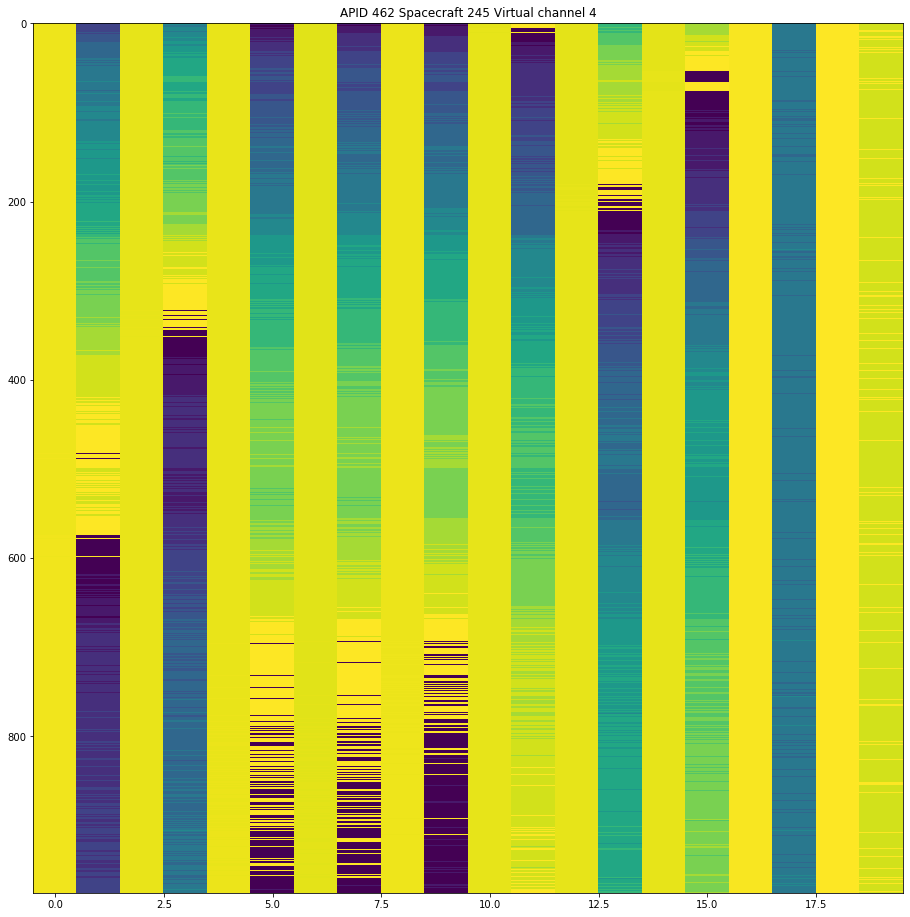

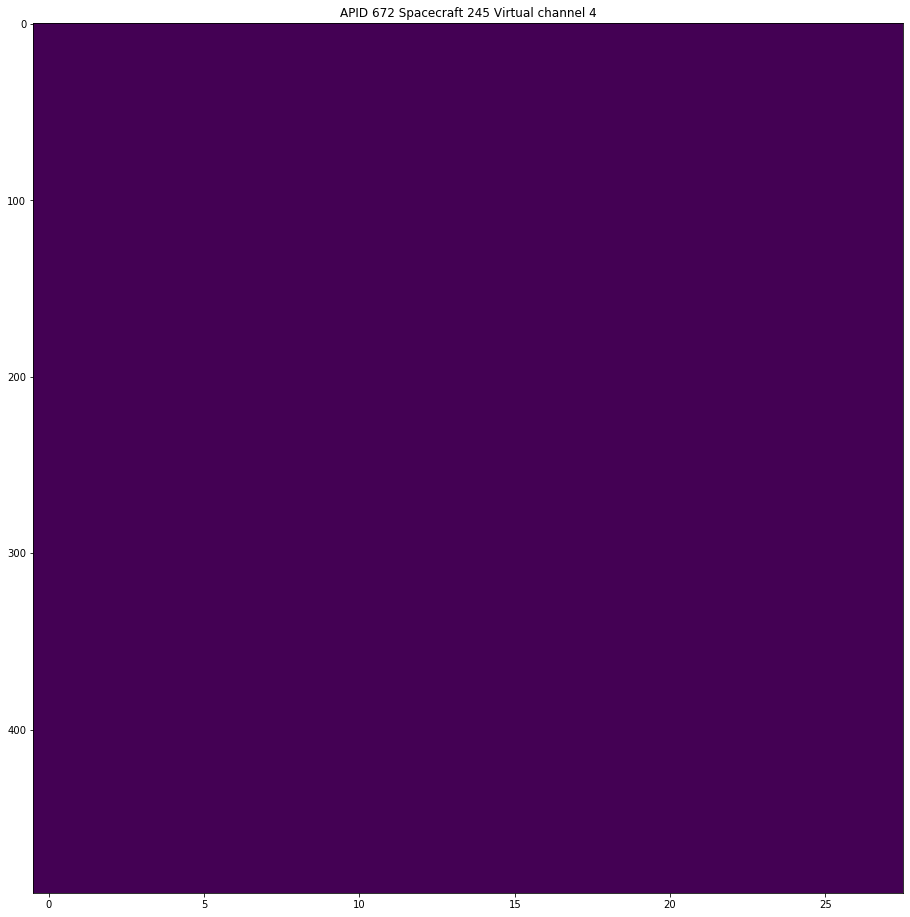

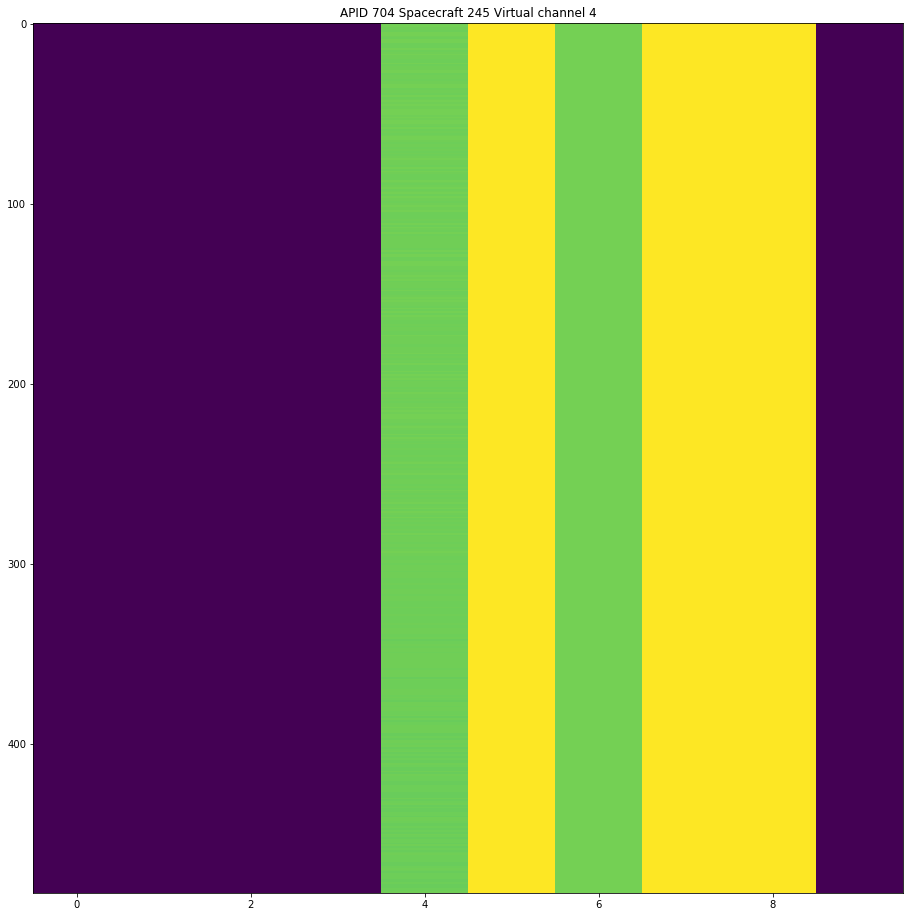

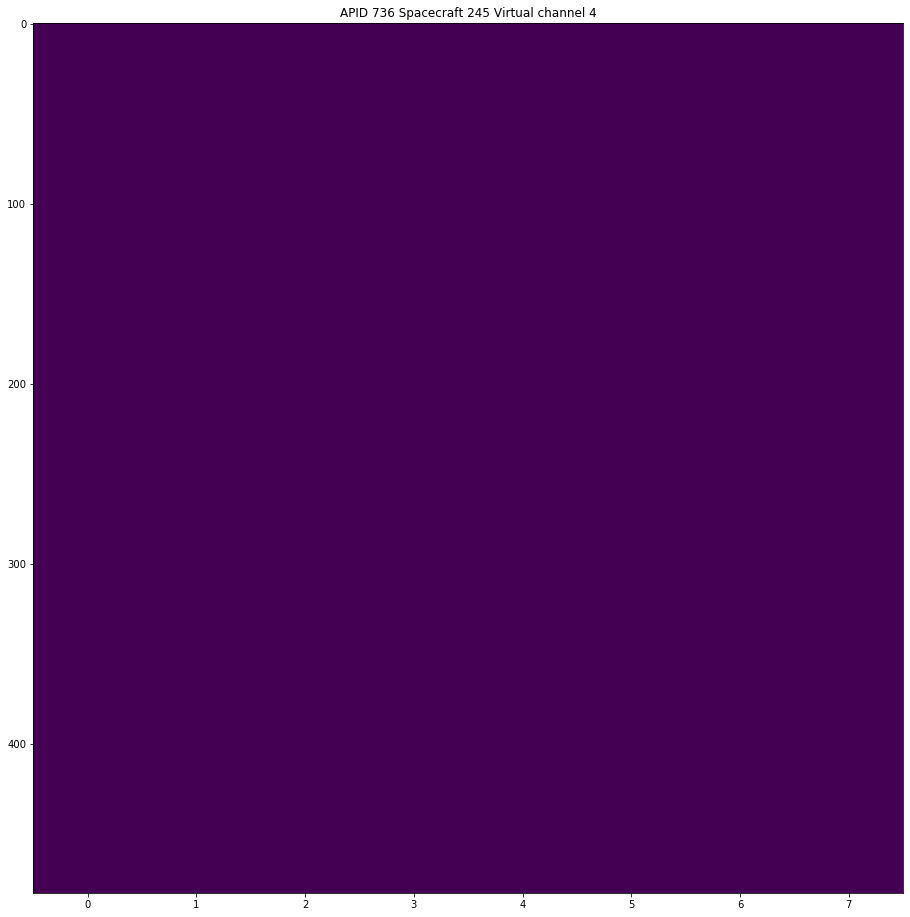

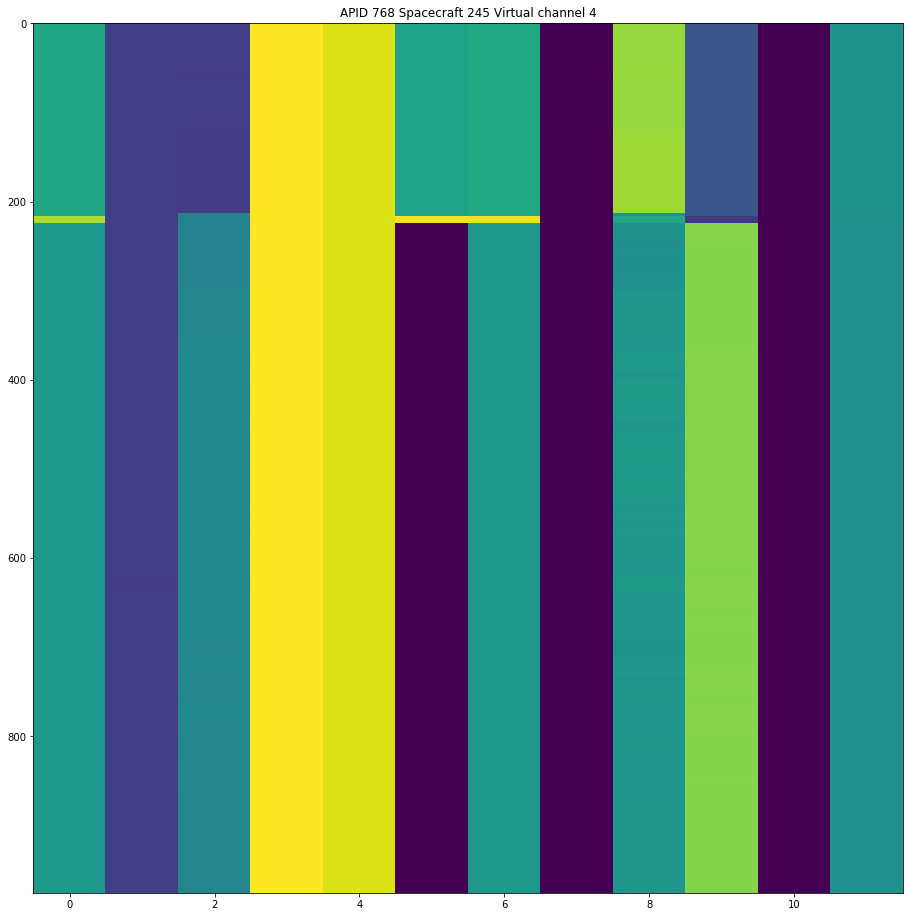

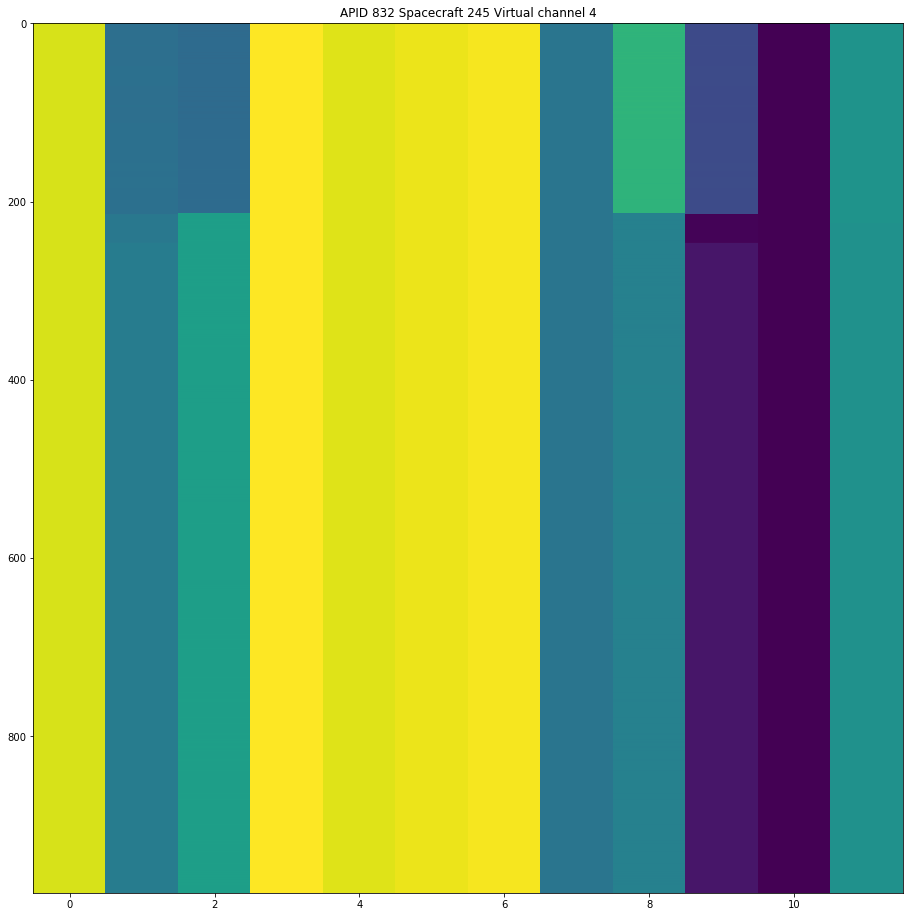

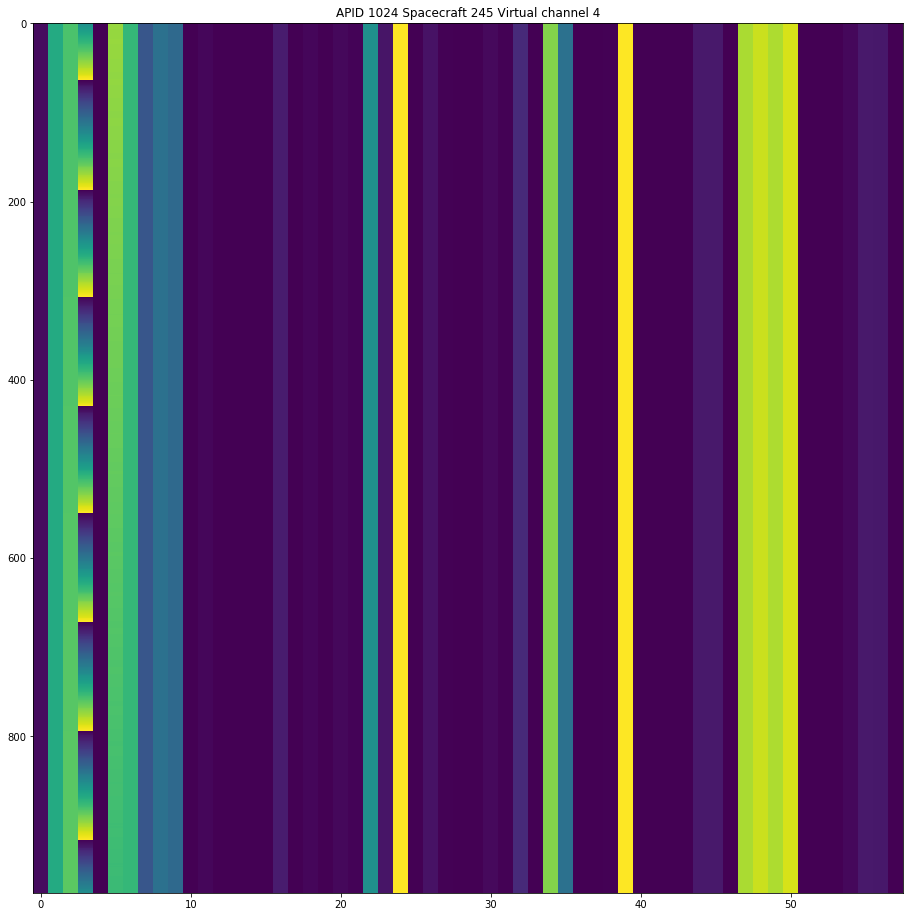

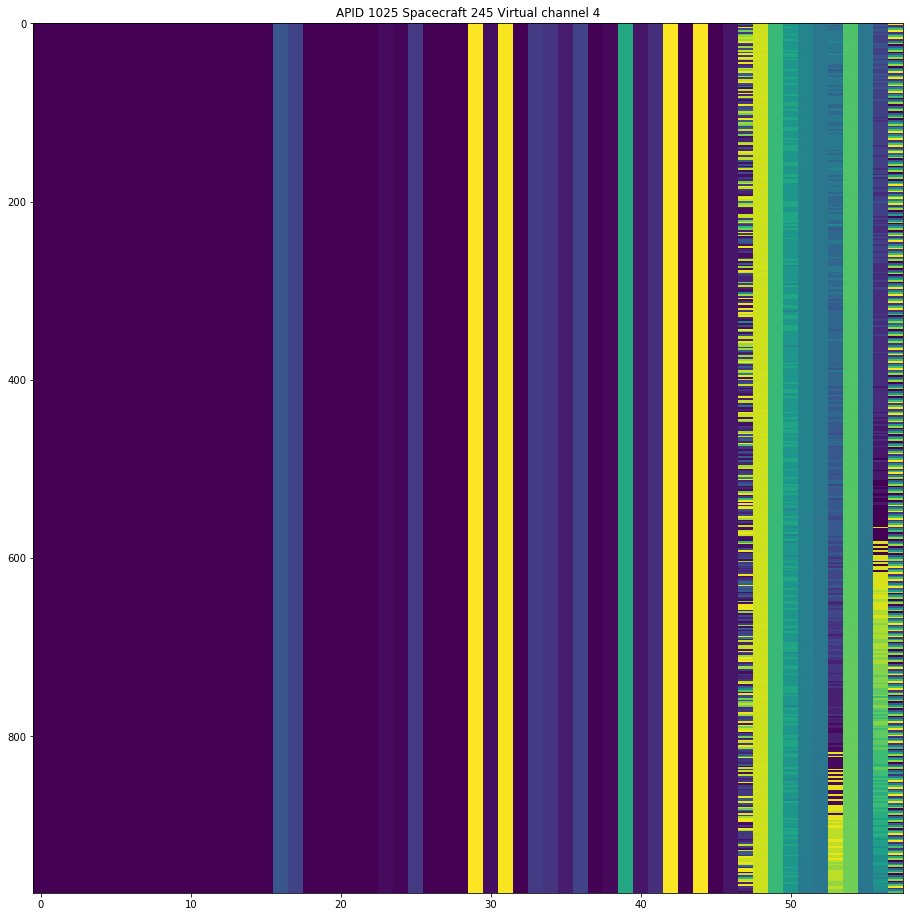

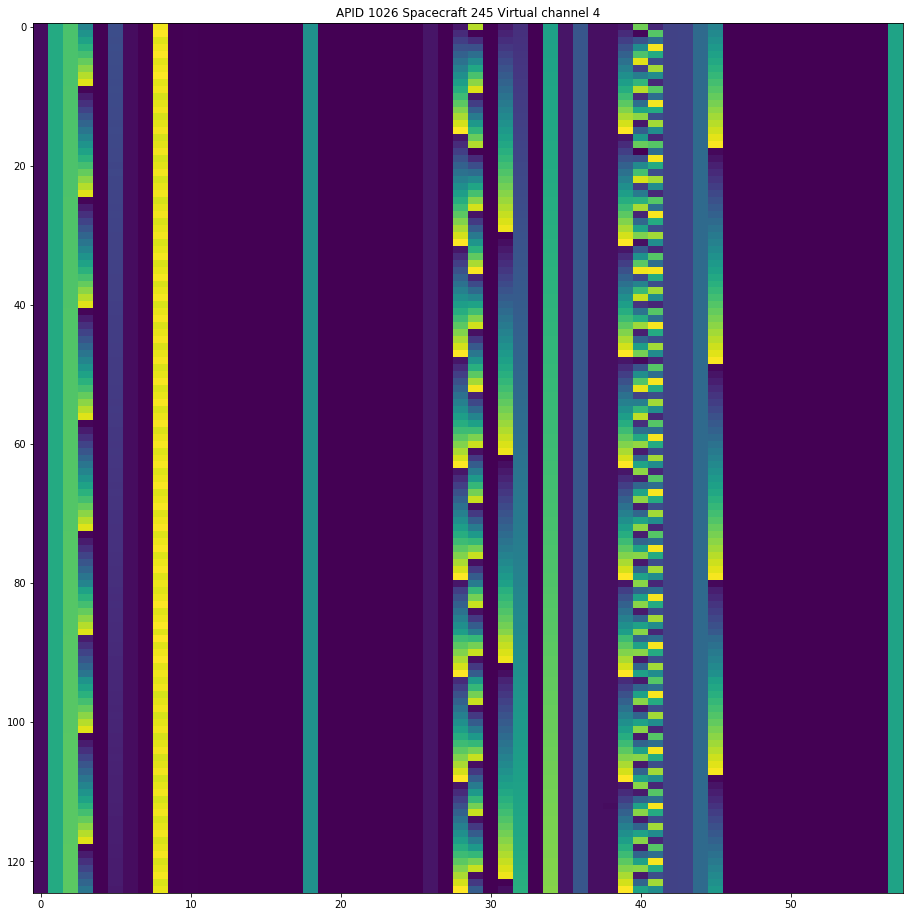

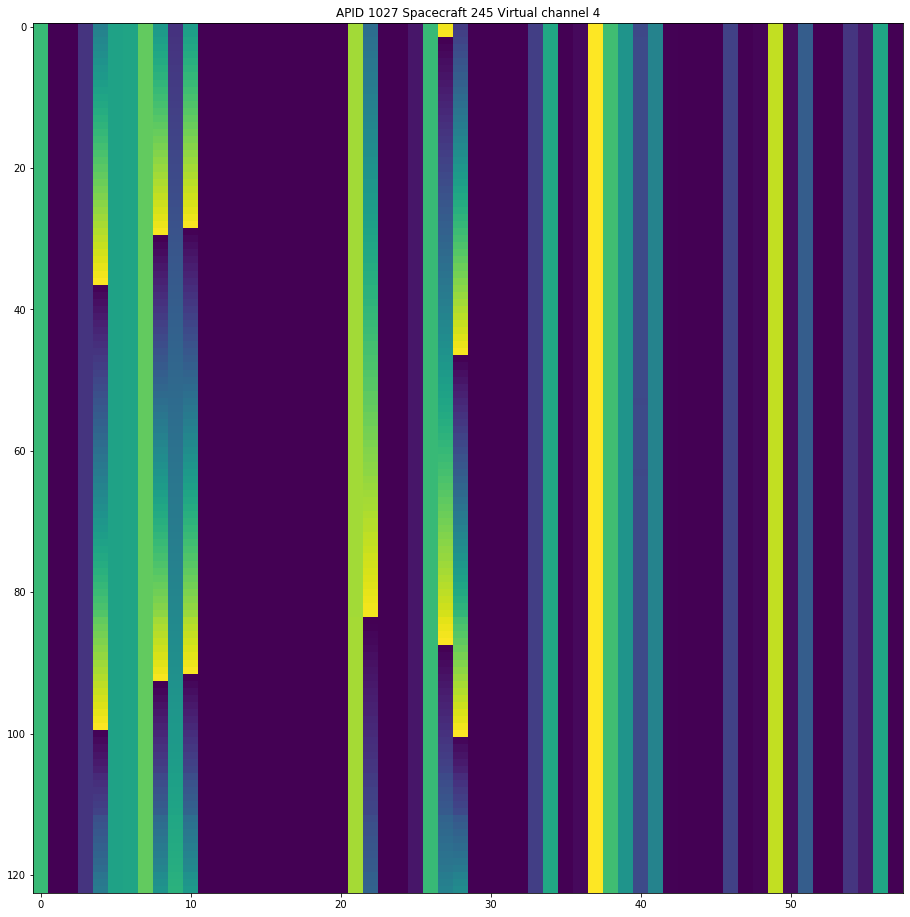

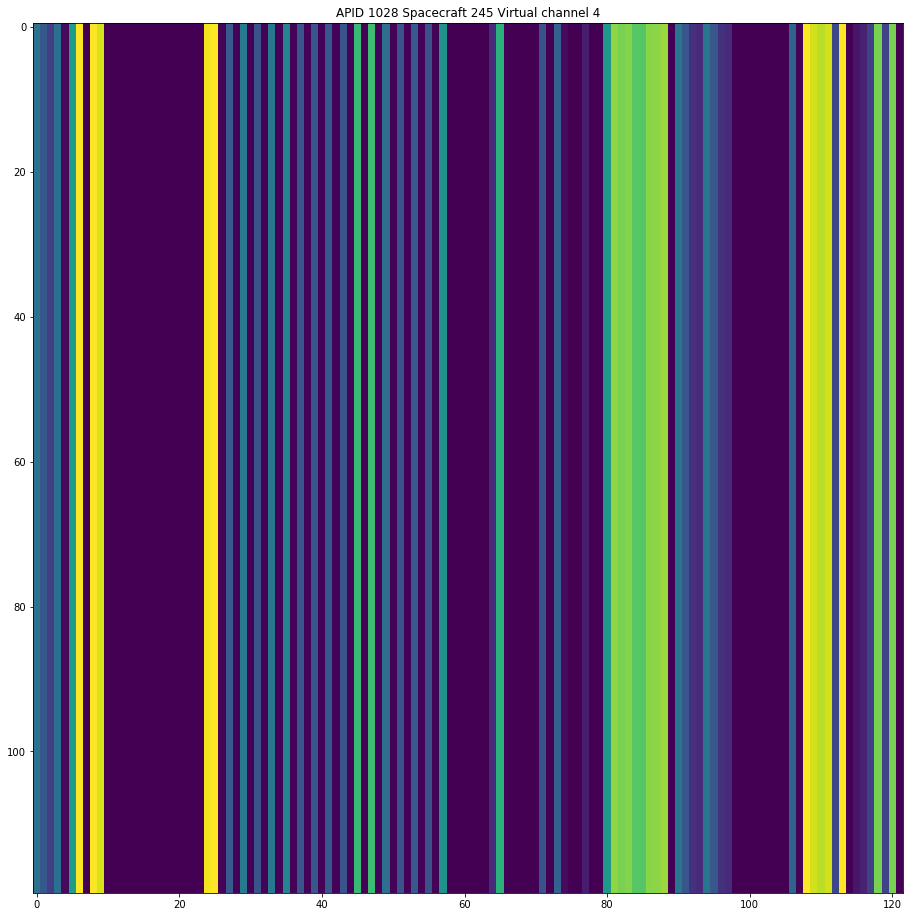

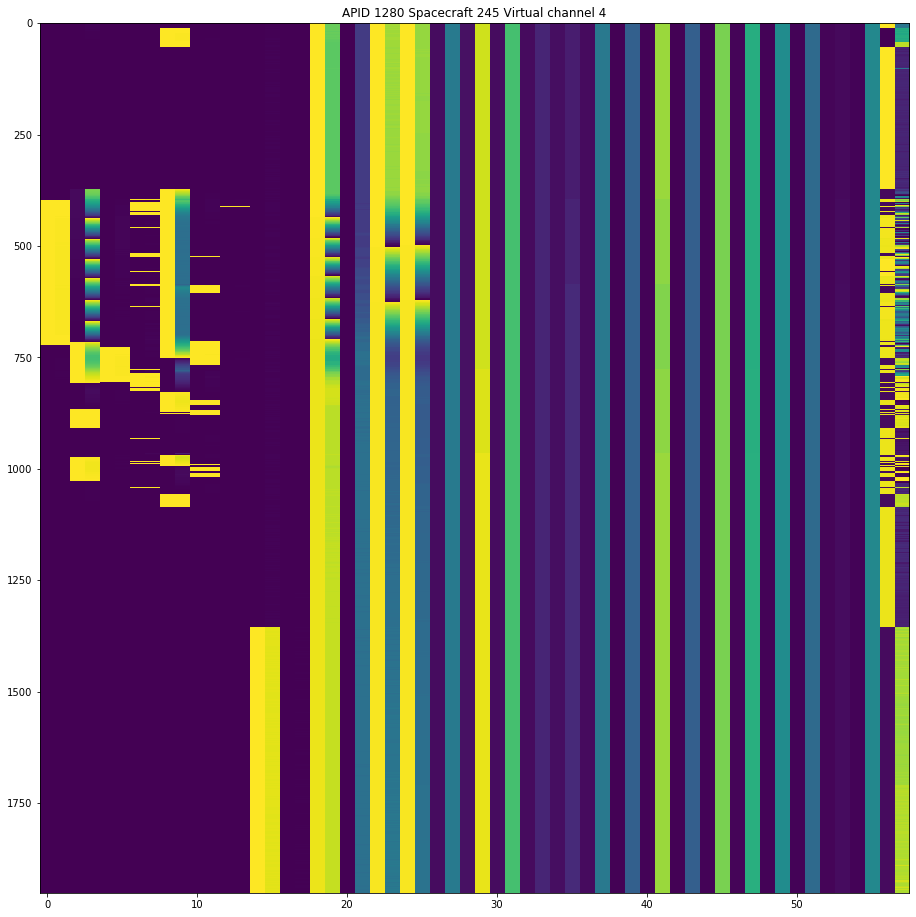

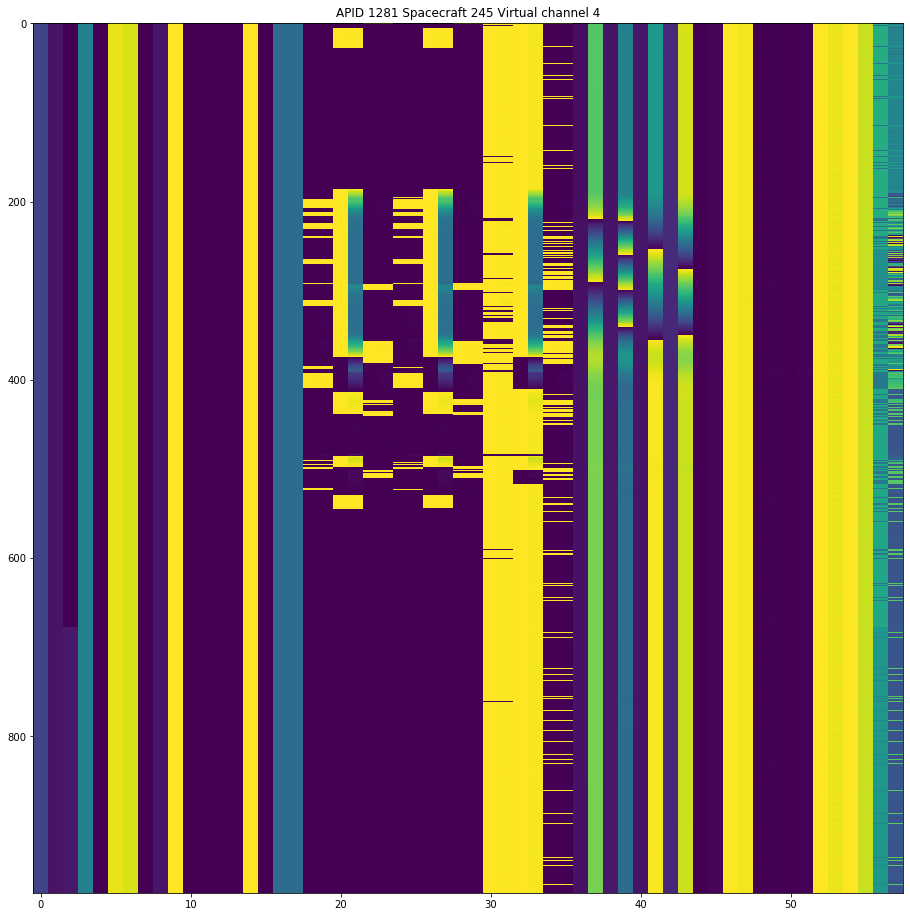

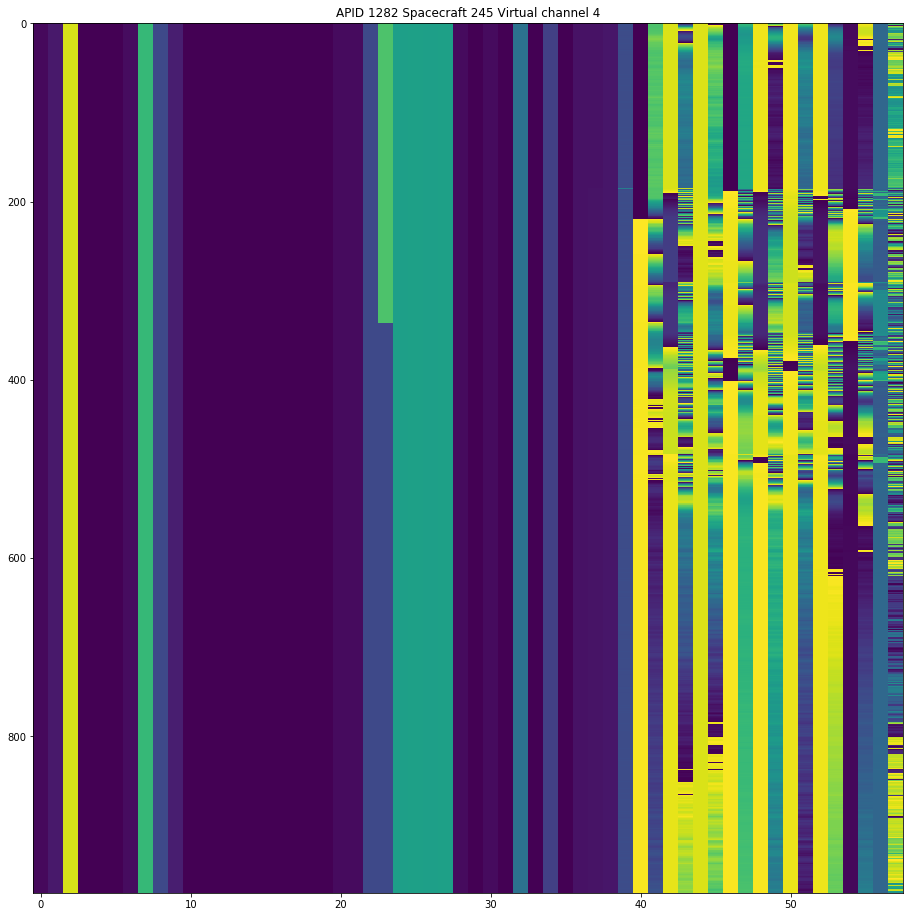

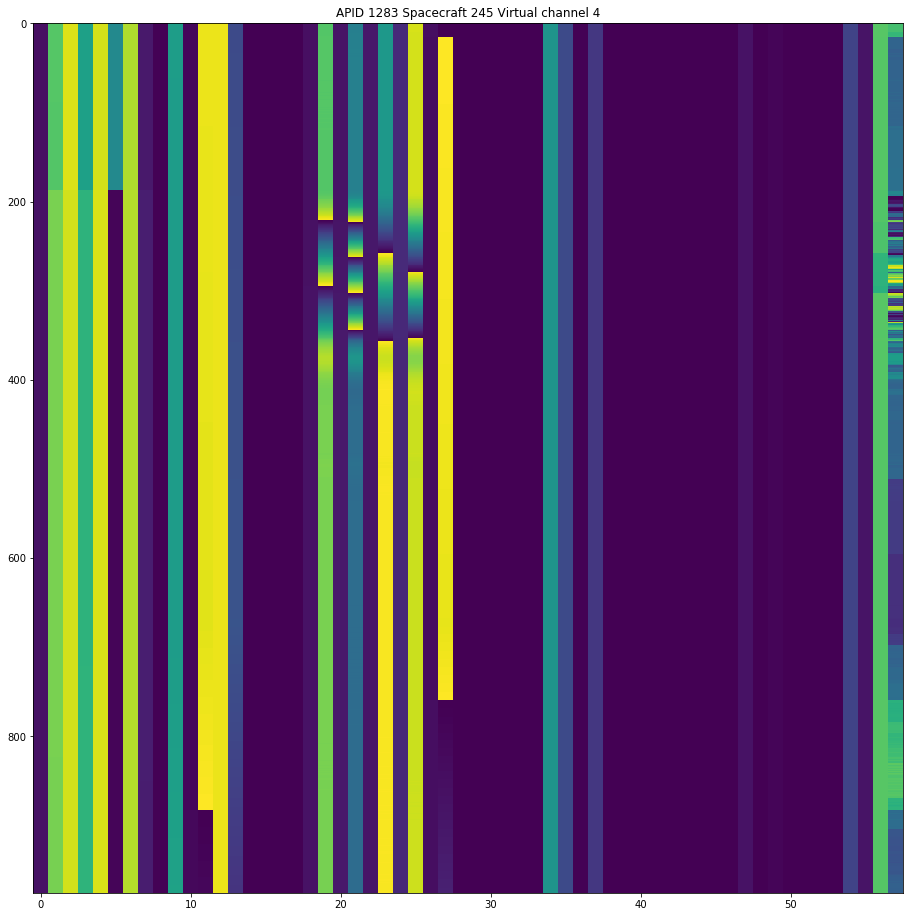

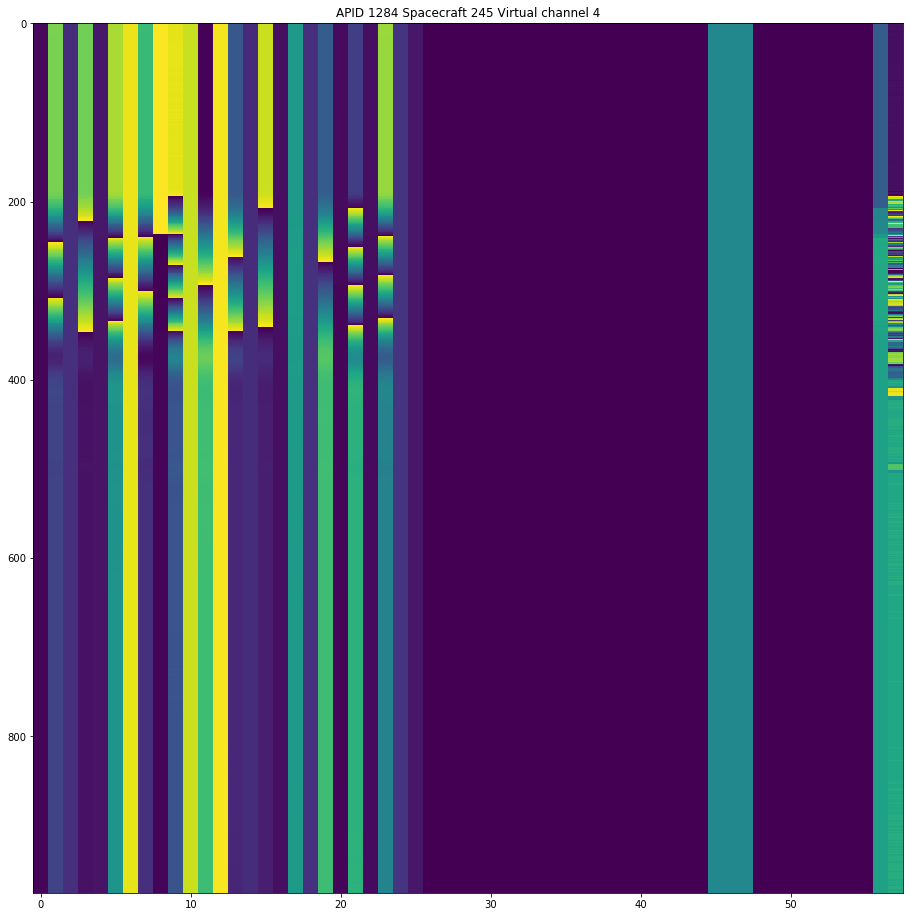

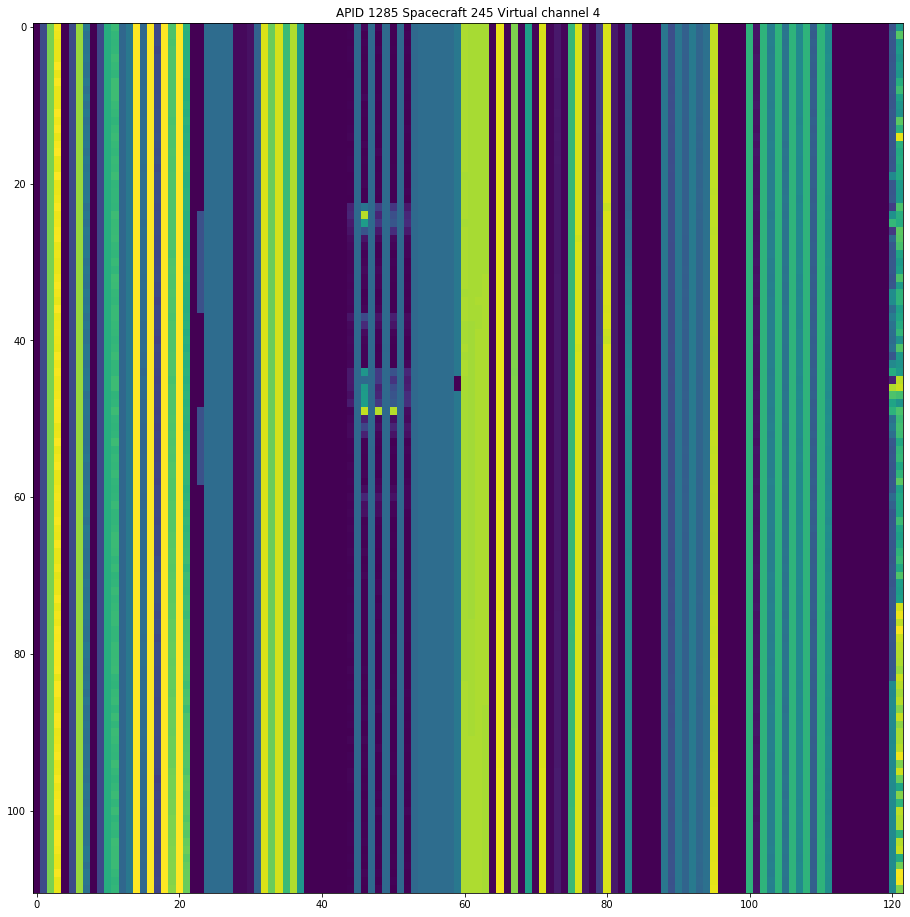

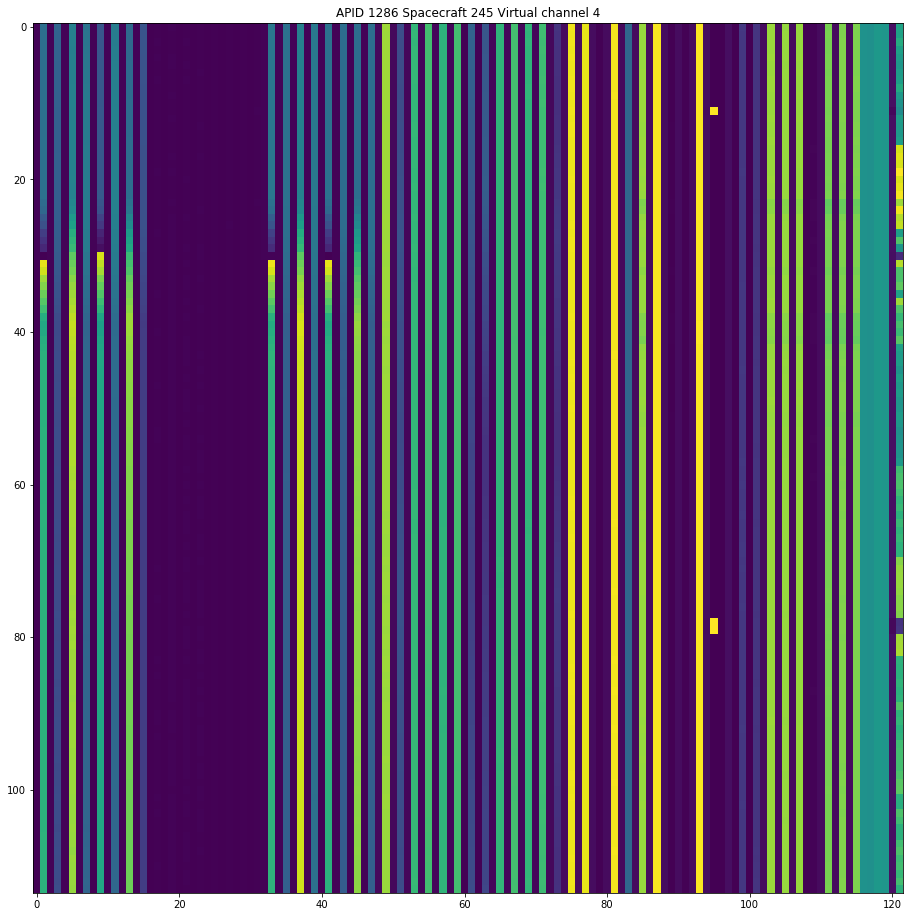

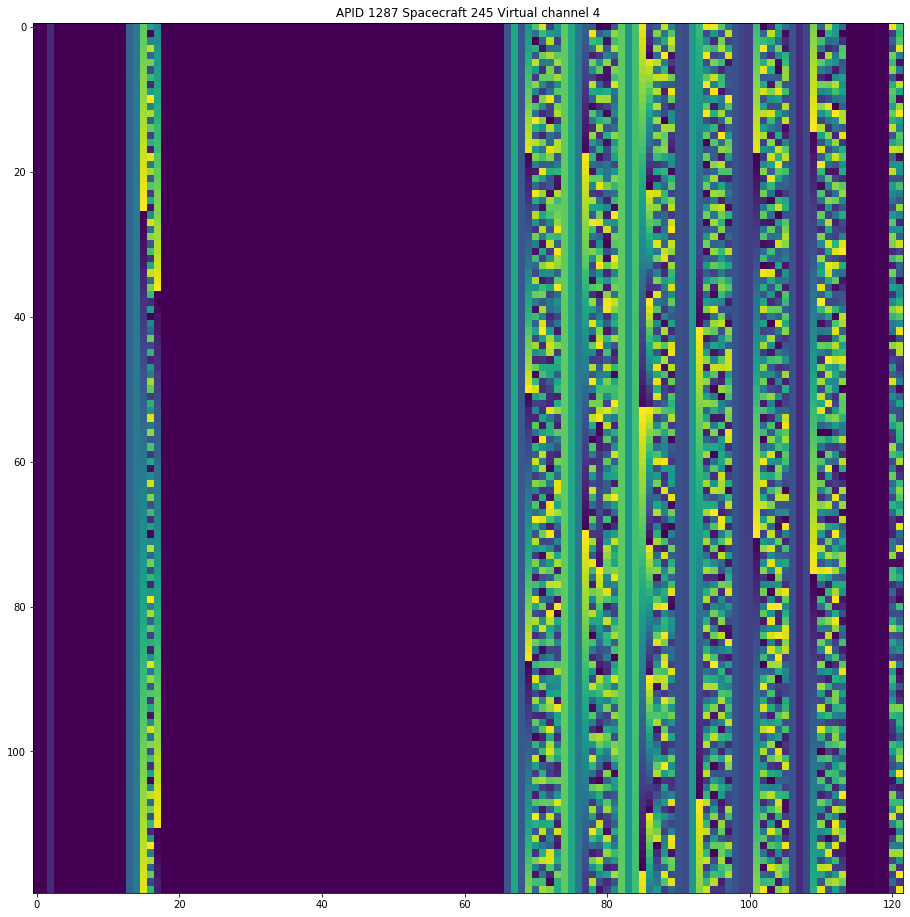

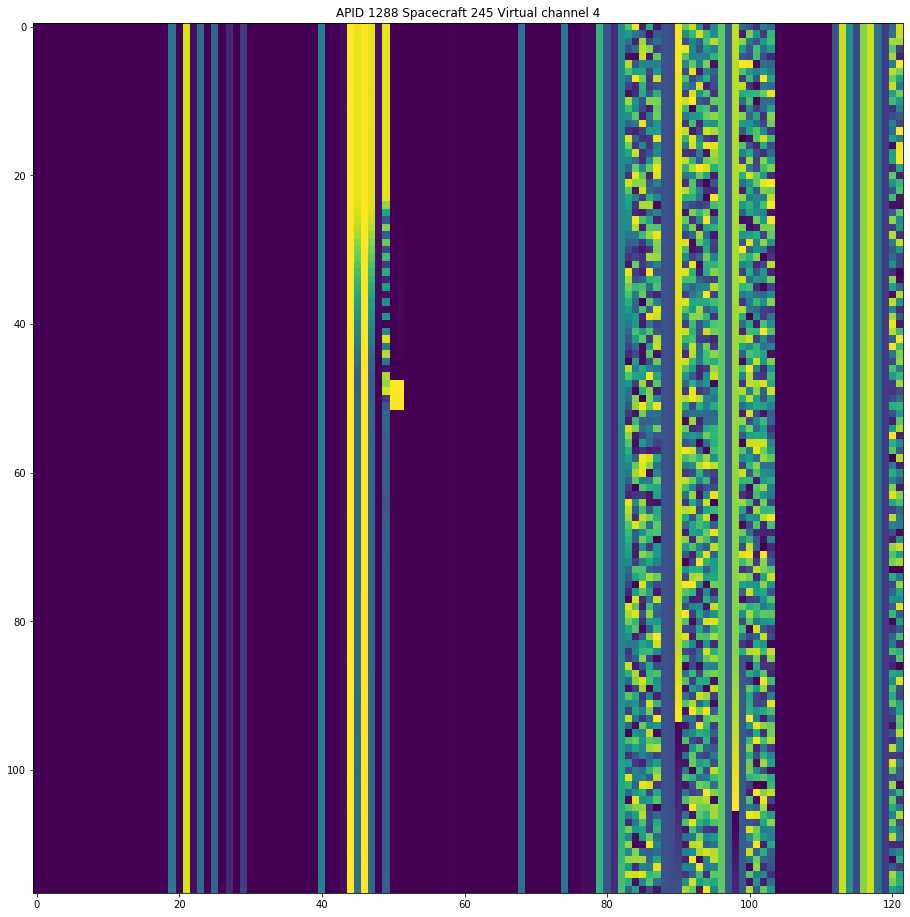

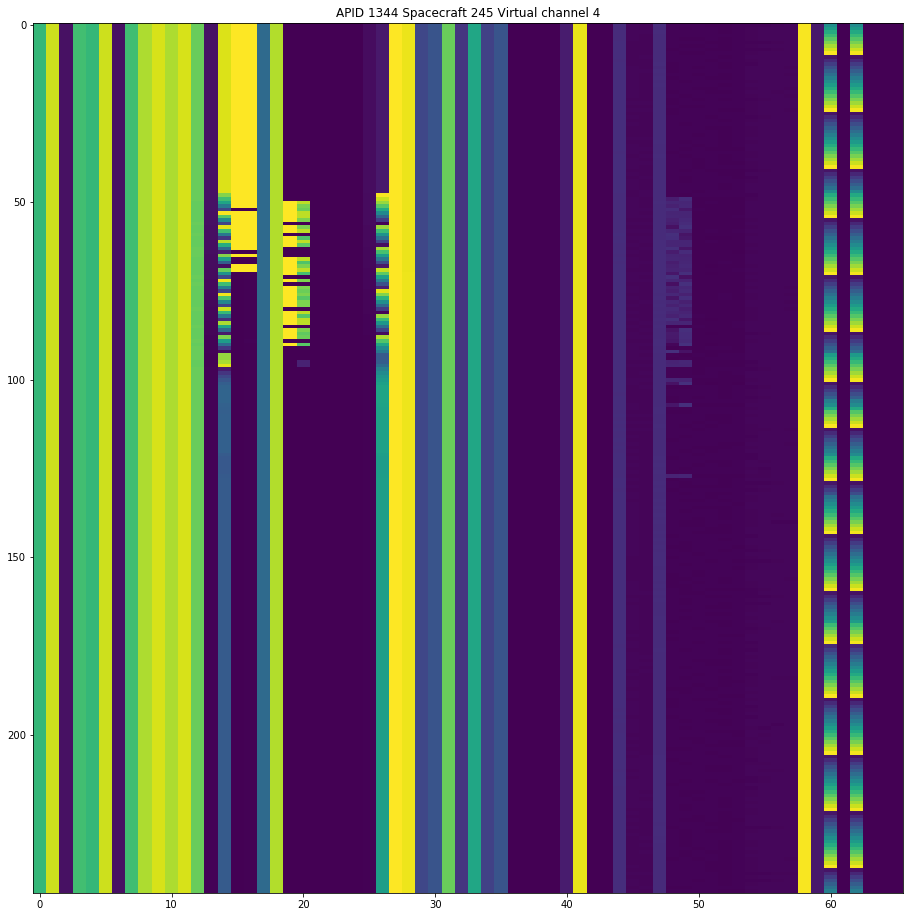

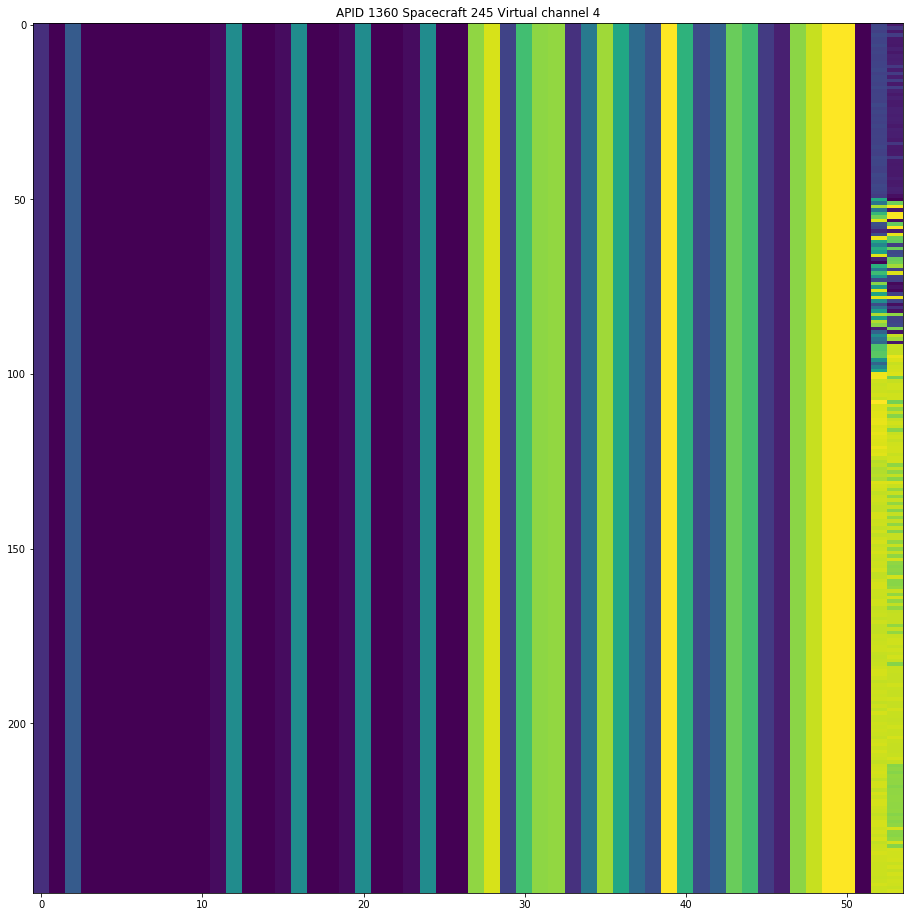

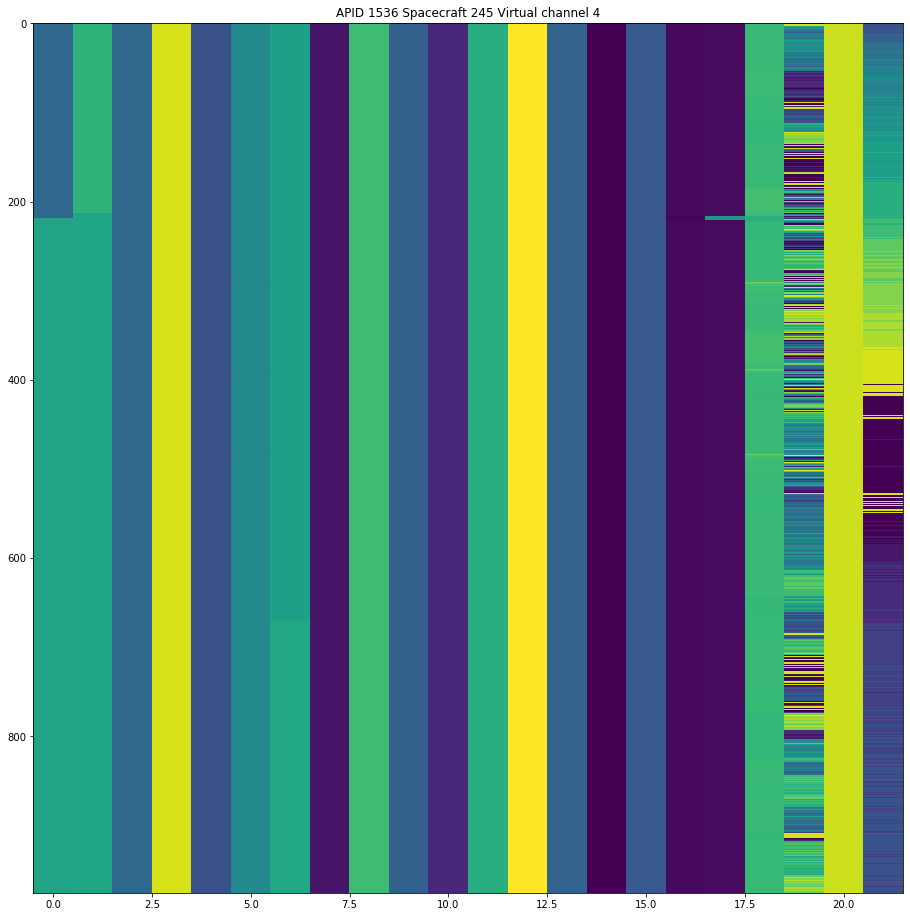

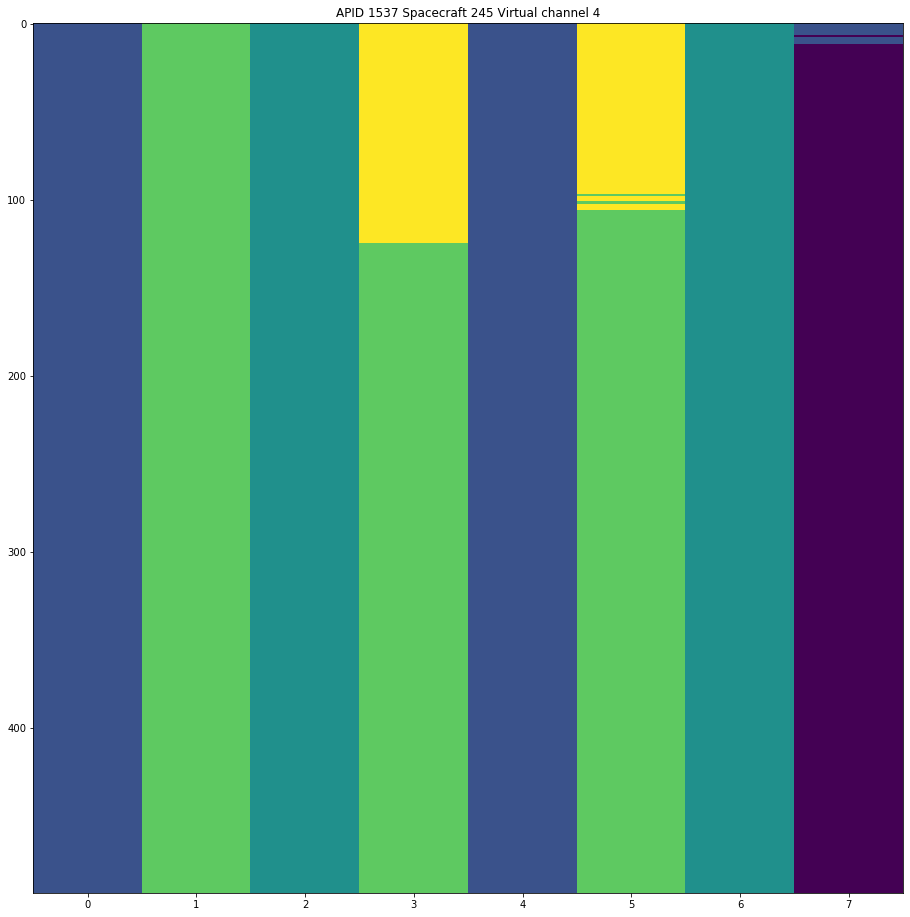

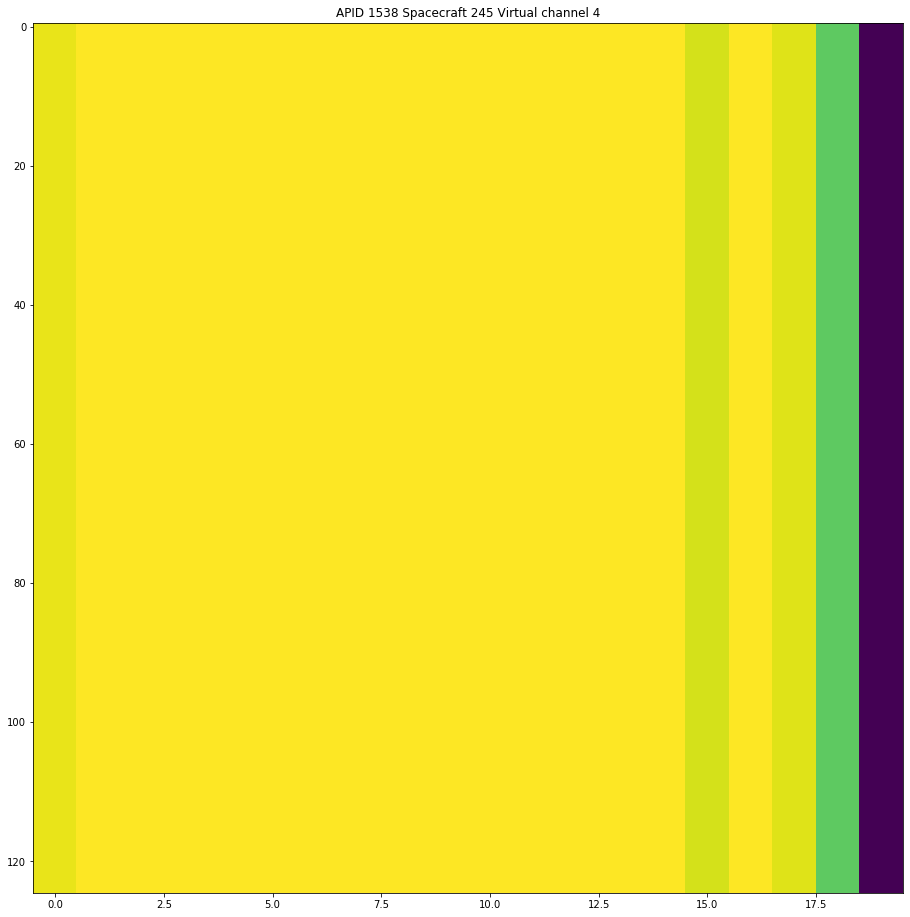

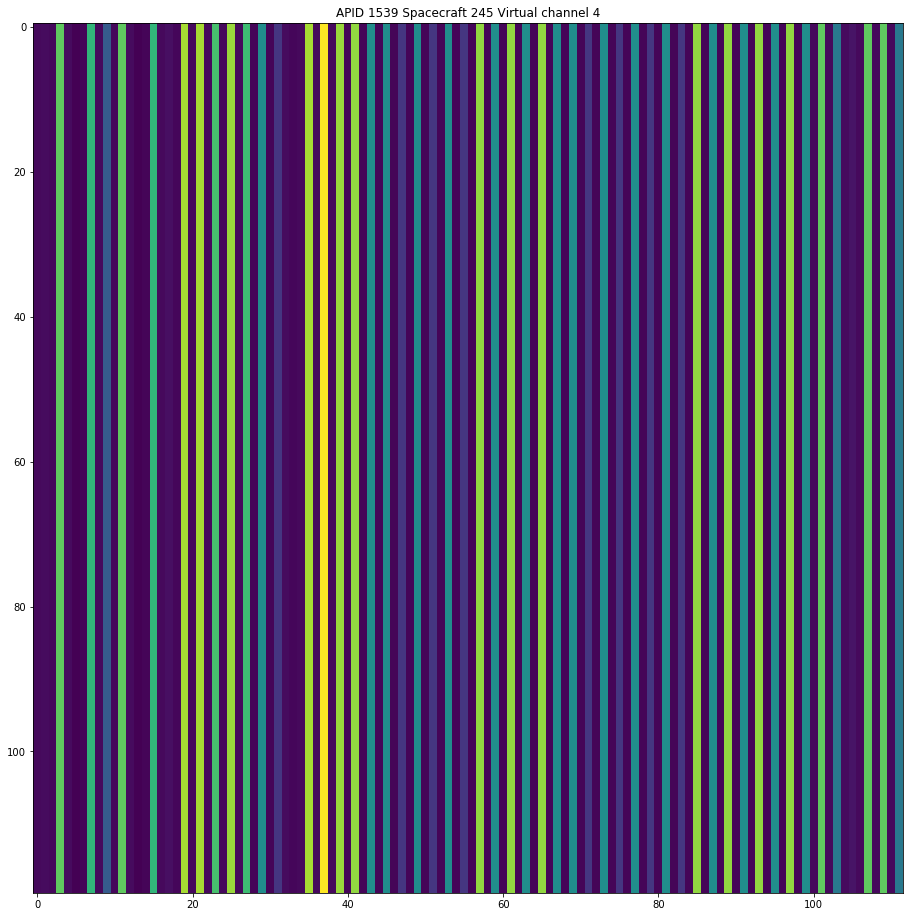

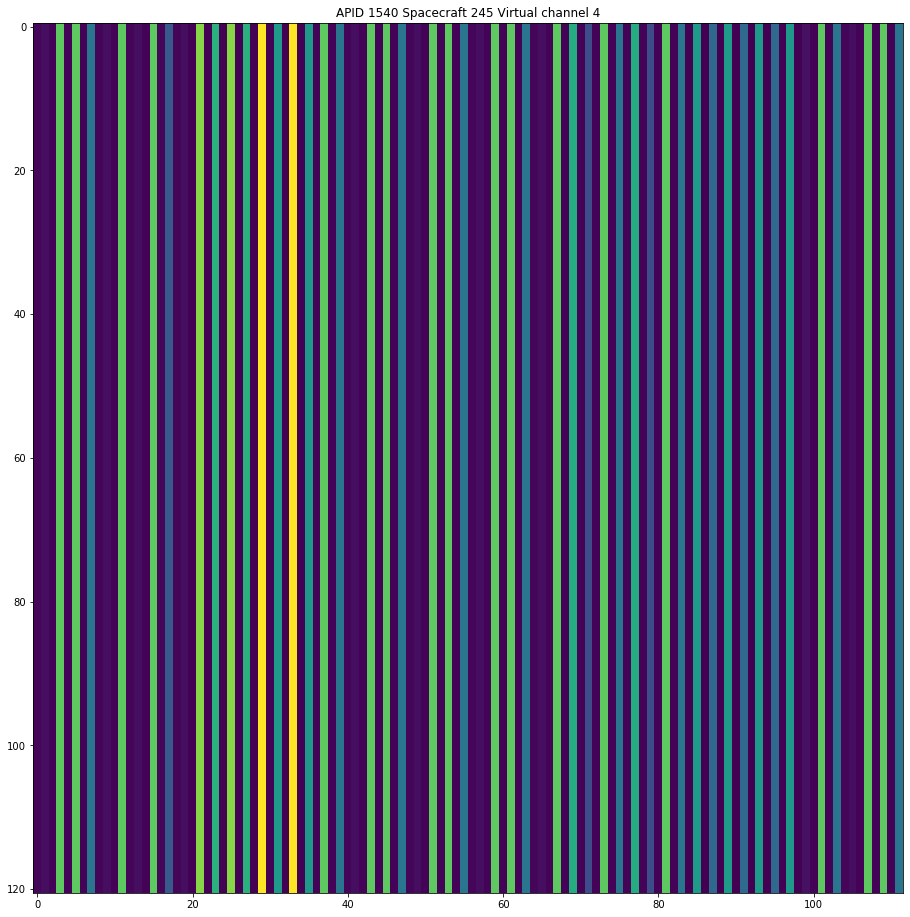

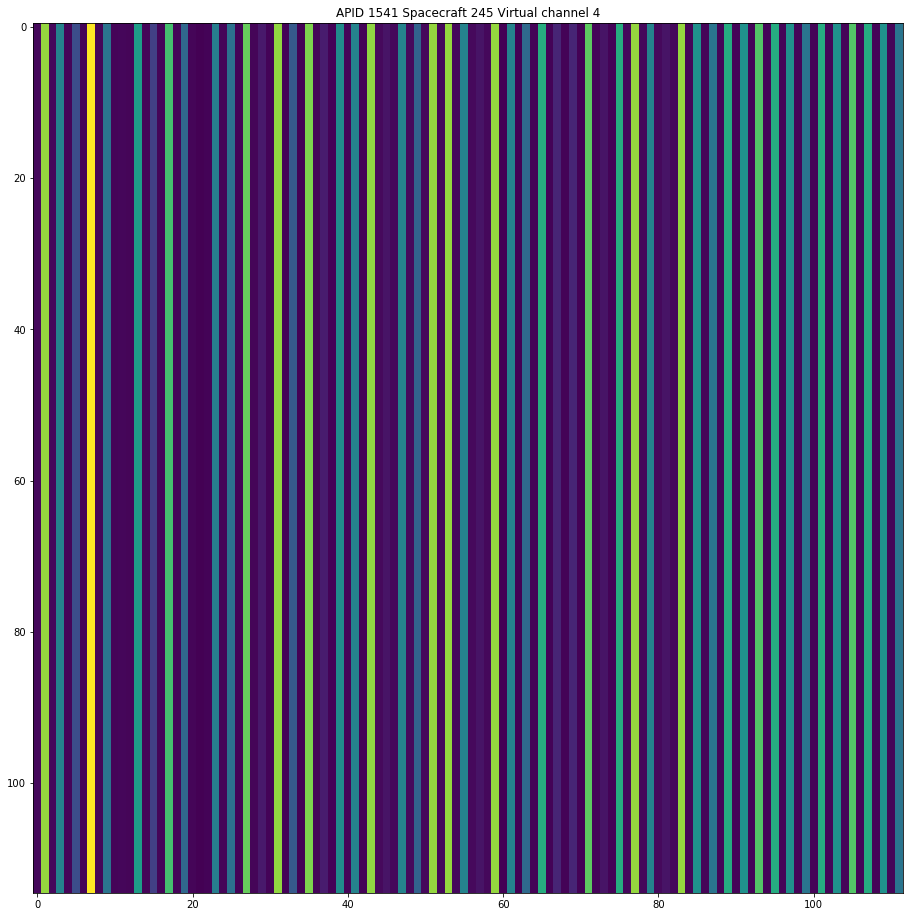

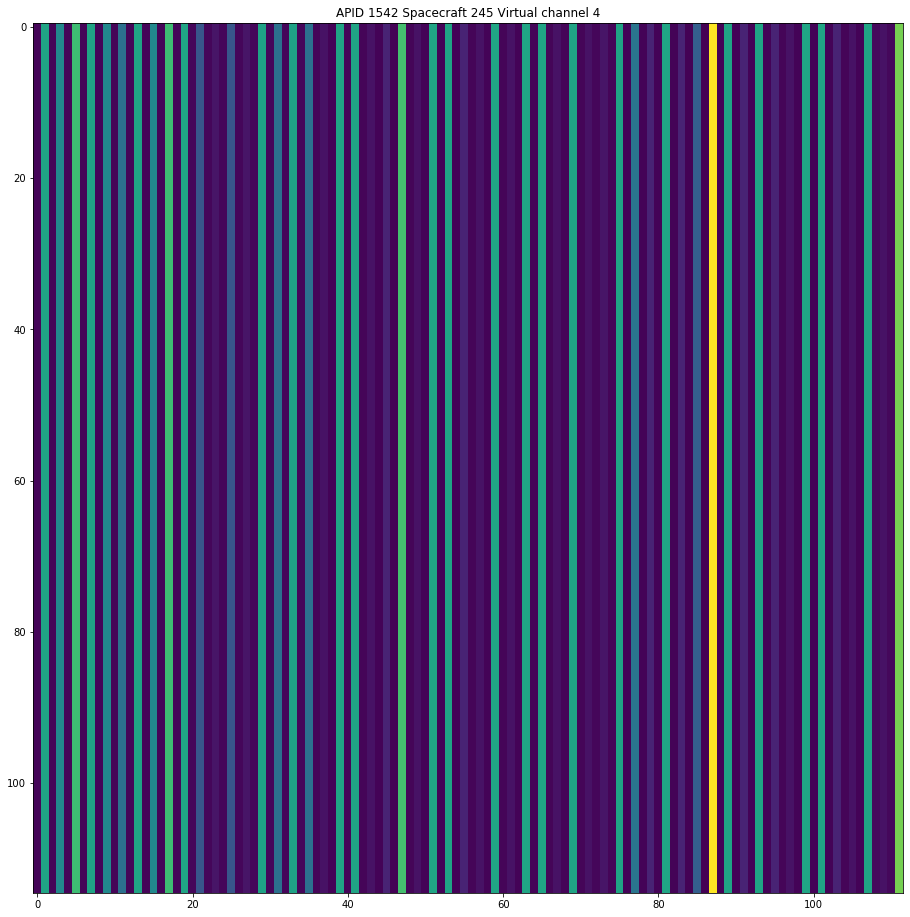

In [32]:
plot_apids(vc4_by_apid, 245, 4)

In [65]:
channels = packets_asarray(vc4_by_apid[1280]).view('int16').byteswap()
timestamps = get_packet_timestamps(vc4_by_apid[1280])

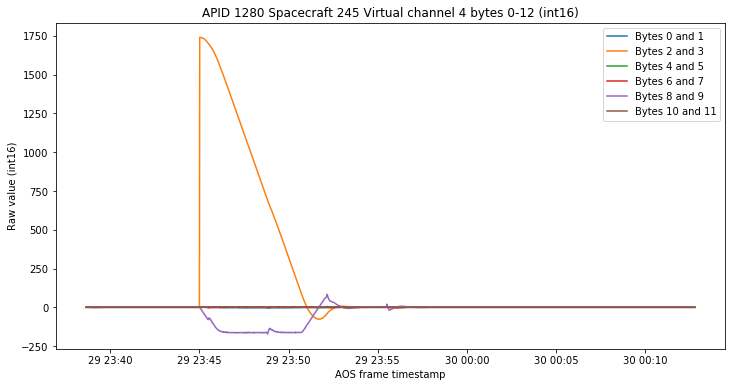

In [34]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps, channels[:,0:6])
plt.title('APID 1280 Spacecraft 245 Virtual channel 4 bytes 0-12 (int16)')
plt.xlabel('AOS frame timestamp')
plt.ylabel('Raw value (int16)')
plt.legend([f'Bytes {j} and {j+1}' for j in range(0,12,2)]);

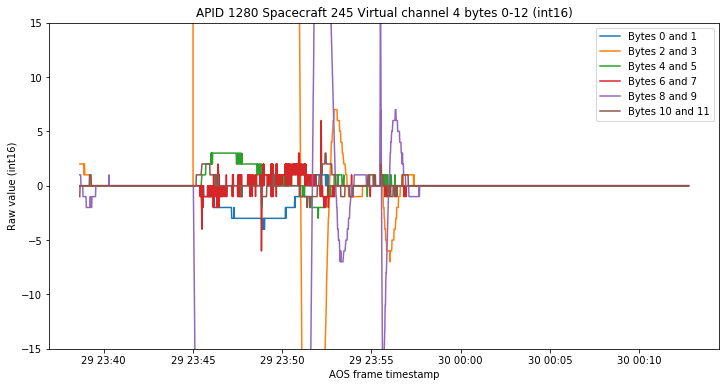

In [35]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps, channels[:,0:6])
plt.title('APID 1280 Spacecraft 245 Virtual channel 4 bytes 0-12 (int16)')
plt.xlabel('AOS frame timestamp')
plt.ylabel('Raw value (int16)')
plt.legend([f'Bytes {j} and {j+1}' for j in range(0,12,2)])
plt.ylim((-15,15));

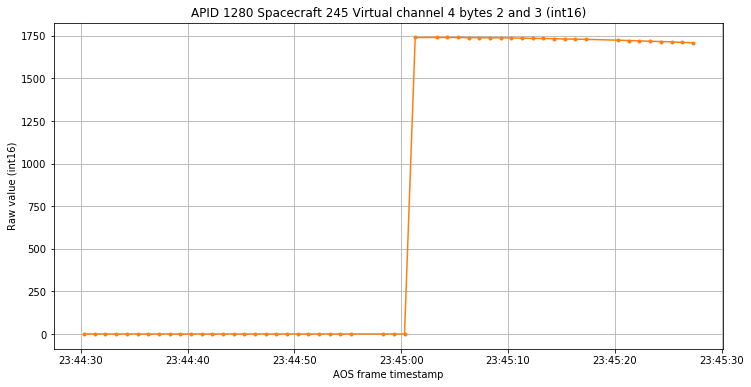

In [36]:
plt.figure(figsize = (12,6), facecolor = 'w')
sel = (timestamps >= np.datetime64('2020-07-29T23:44:30')) & (timestamps <= np.datetime64('2020-07-29T23:45:30'))
plt.plot(timestamps[sel], channels[sel,1], '.-', color = 'C1')
plt.title('APID 1280 Spacecraft 245 Virtual channel 4 bytes 2 and 3 (int16)')
plt.xlabel('AOS frame timestamp')
plt.ylabel('Raw value (int16)')
plt.grid();

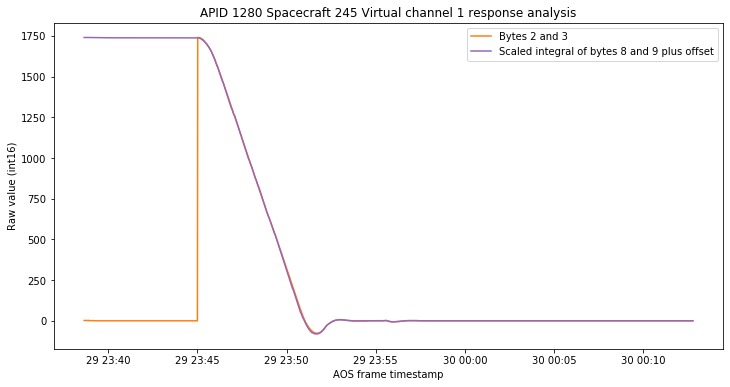

In [37]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps, channels[:,1], color = 'C1')
A = np.max(channels[:,1])
cs = np.cumsum(channels[:,4])
cs = cs*A/(-cs[-1]) + A
plt.plot(timestamps, cs, color = 'C4')
plt.title('APID 1280 Spacecraft 245 Virtual channel 1 response analysis')
plt.xlabel('AOS frame timestamp')
plt.ylabel('Raw value (int16)')
plt.legend(['Bytes 2 and 3', 'Scaled integral of bytes 8 and 9 plus offset']);

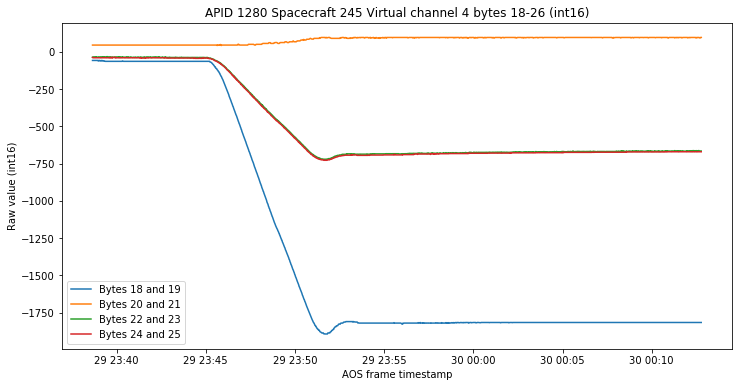

In [38]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps, channels[:,9:13])
plt.title('APID 1280 Spacecraft 245 Virtual channel 4 bytes 18-26 (int16)')
plt.xlabel('AOS frame timestamp')
plt.ylabel('Raw value (int16)')
plt.legend([f'Bytes {j} and {j+1}' for j in range(18,26,2)]);

Text(0, 0.5, 'Raw value (int16)')

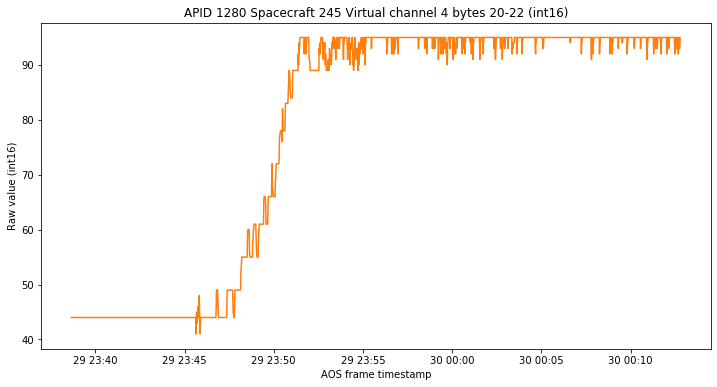

In [39]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps, channels[:,10], color = 'C1')
plt.title('APID 1280 Spacecraft 245 Virtual channel 4 bytes 20-22 (int16)')
plt.xlabel('AOS frame timestamp')
plt.ylabel('Raw value (int16)')

In [66]:
channels = packets_asarray(vc4_by_apid[1281]).view('int16').byteswap()
timestamps = get_packet_timestamps(vc4_by_apid[1281])

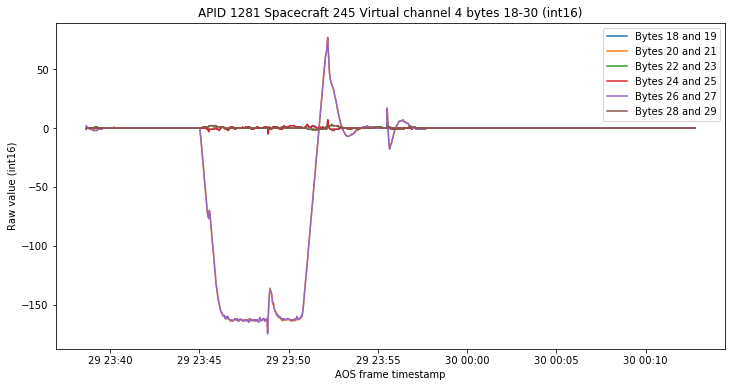

In [41]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps, channels[:,9:15])
plt.title('APID 1281 Spacecraft 245 Virtual channel 4 bytes 18-30 (int16)')
plt.xlabel('AOS frame timestamp')
plt.ylabel('Raw value (int16)')
plt.legend([f'Bytes {j} and {j+1}' for j in range(9*2,15*2,2)]);

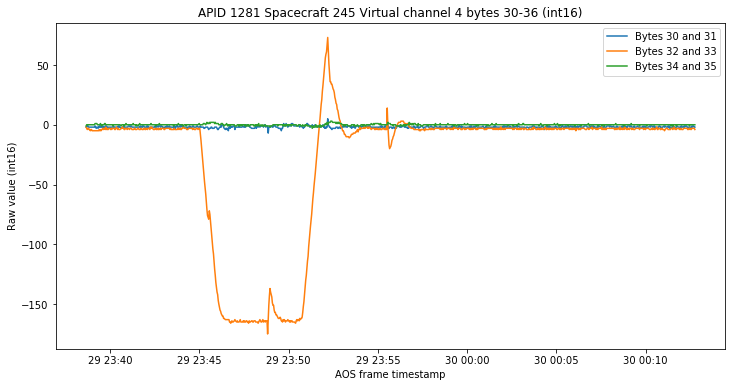

In [68]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps[:], channels[:,15:18])
plt.title('APID 1281 Spacecraft 245 Virtual channel 4 bytes 30-36 (int16)')
plt.xlabel('AOS frame timestamp')
plt.ylabel('Raw value (int16)')
plt.legend([f'Bytes {j} and {j+1}' for j in range(2*15,18*2,2)]);

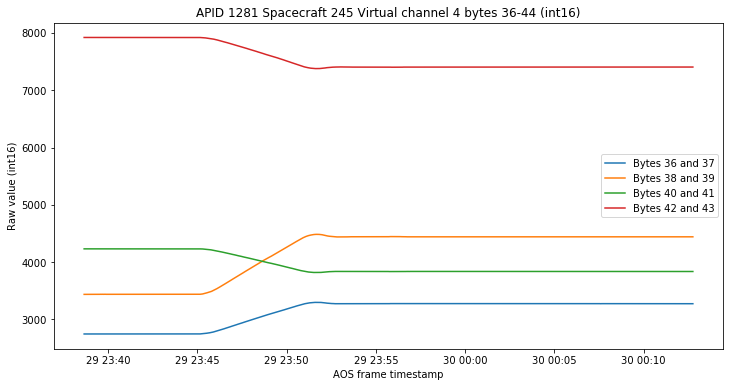

In [42]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps, channels[:,18:22])
plt.title('APID 1281 Spacecraft 245 Virtual channel 4 bytes 36-44 (int16)')
plt.xlabel('AOS frame timestamp')
plt.ylabel('Raw value (int16)')
plt.legend([f'Bytes {j} and {j+1}' for j in range(36,44,2)]);

Text(0, 0.5, 'Quaternion norm')

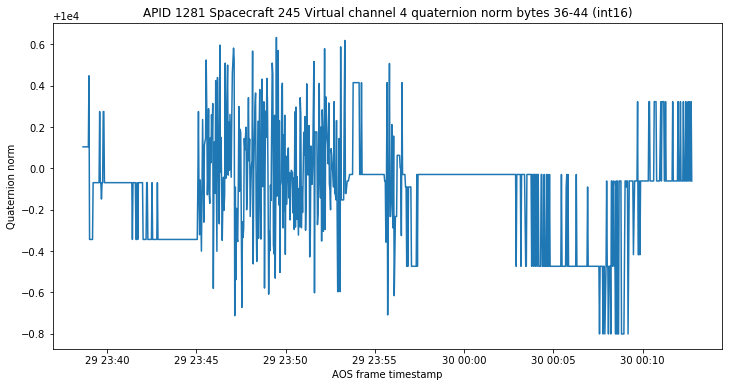

In [43]:
plt.figure(figsize = (12,6), facecolor = 'w')
quaternion_norm = np.sqrt(np.sum(channels[:,18:22].astype('float')**2, axis = 1))
plt.plot(timestamps, quaternion_norm)
plt.title('APID 1281 Spacecraft 245 Virtual channel 4 quaternion norm bytes 36-44 (int16)')
plt.xlabel('AOS frame timestamp')
plt.ylabel('Quaternion norm')

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


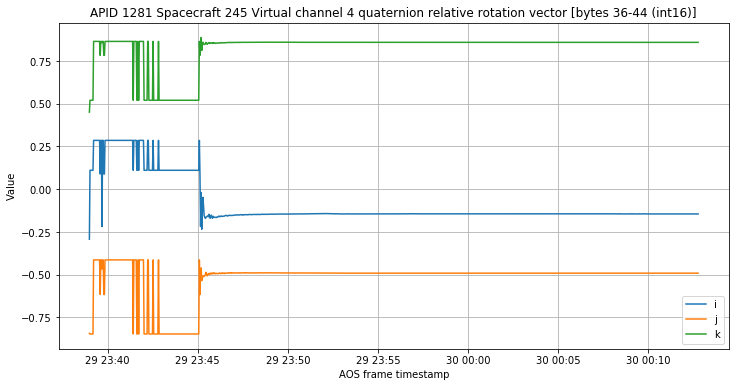

In [44]:
q = Rotation.from_quat(channels[:,18:22][:,[1,2,3,0]] * 1e-4) # scalar last format
H = q*q[0].inv()
V = H.as_quat()[:,:-1]
V /= np.sqrt(np.sum(V**2, axis = 1)).reshape((-1,1))
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps, V)
plt.title('APID 1281 Spacecraft 245 Virtual channel 4 quaternion relative rotation vector [bytes 36-44 (int16)]')
plt.xlabel('AOS frame timestamp')
plt.ylabel('Value')
plt.legend(['i', 'j', 'k'])
plt.grid();

In [45]:
V[-1]

array([-0.14468192, -0.49106965,  0.85902139])

In [46]:
q[0].as_matrix()

array([[-0.61269098, -0.14412949,  0.77706914],
       [ 0.72610204, -0.49089391,  0.48145508],
       [ 0.31206664,  0.85921467,  0.40541899]])

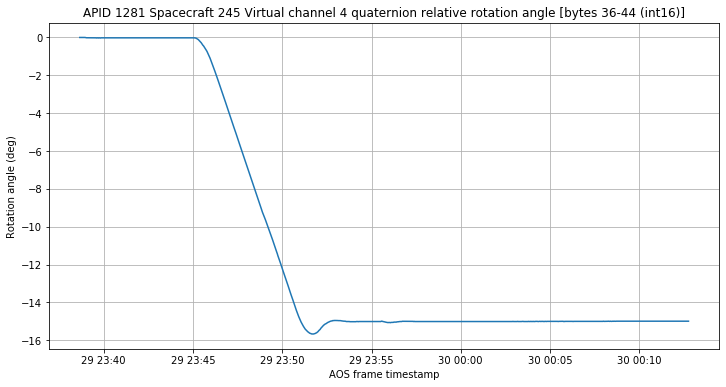

In [47]:
theta = 2 * np.arctan2(np.sqrt(np.sum(H.as_quat()[:,:-1]**2, axis = 1)), H.as_quat()[:,-1])
theta = (theta + np.pi) % (2*np.pi) - np.pi
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps, np.rad2deg(theta))
plt.title('APID 1281 Spacecraft 245 Virtual channel 4 quaternion relative rotation angle [bytes 36-44 (int16)]')
plt.xlabel('AOS frame timestamp')
plt.ylabel('Rotation angle (deg)')
plt.grid();

In [48]:
np.rad2deg(theta[-1])

-14.99142017446401

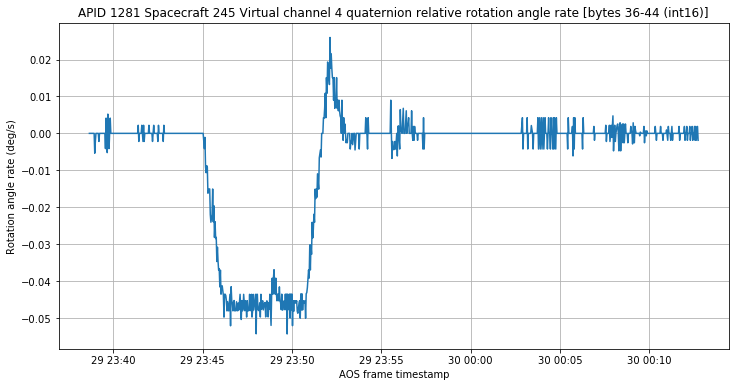

In [49]:
plt.figure(figsize = (12,6), facecolor = 'w')
dt = np.diff(timestamps)/np.timedelta64(1,'s')
plt.plot(timestamps[:-1], np.rad2deg(np.diff(theta)/dt))
plt.title('APID 1281 Spacecraft 245 Virtual channel 4 quaternion relative rotation angle rate [bytes 36-44 (int16)]')
plt.xlabel('AOS frame timestamp')
plt.ylabel('Rotation angle rate (deg/s)')
plt.grid();

In [50]:
channels = packets_asarray(vc4_by_apid[1282]).view('int16').byteswap()
timestamps = get_packet_timestamps(vc4_by_apid[1282])

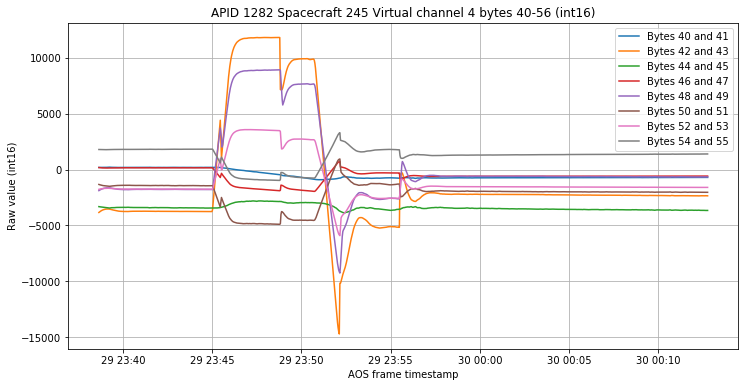

In [51]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps, channels[:,20:28])
plt.title('APID 1282 Spacecraft 245 Virtual channel 4 bytes 40-56 (int16)')
plt.xlabel('AOS frame timestamp')
plt.ylabel('Raw value (int16)')
plt.legend([f'Bytes {j} and {j+1}' for j in range(40,56,2)])
plt.grid();

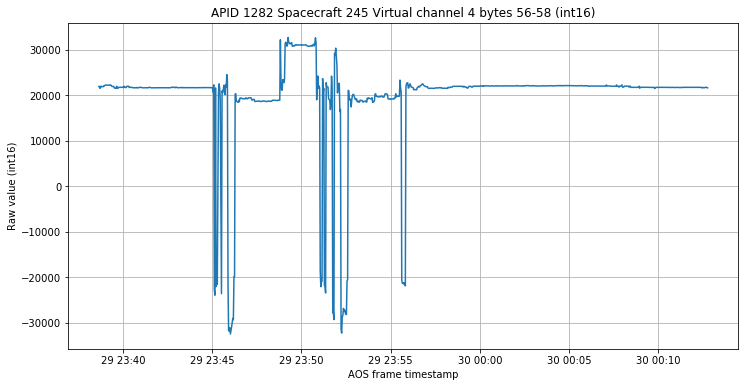

In [52]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps, channels[:,28])
plt.title('APID 1282 Spacecraft 245 Virtual channel 4 bytes 56-58 (int16)')
plt.xlabel('AOS frame timestamp')
plt.ylabel('Raw value (int16)')
plt.grid()

In [53]:
channels = np.copy(packets_asarray(vc4_by_apid[1288])[:,80:][:,:3*8]).view('float64').byteswap()
timestamps = get_packet_timestamps(vc4_by_apid[1288])

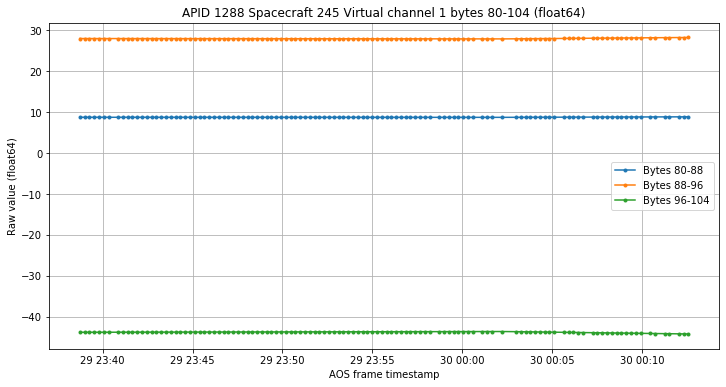

In [54]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps, channels[:,:], '.-')
plt.title('APID 1288 Spacecraft 245 Virtual channel 1 bytes 80-104 (float64)')
plt.xlabel('AOS frame timestamp')
plt.ylabel('Raw value (float64)')
plt.legend([f'Bytes {j}-{j+8}' for j in range(80,104,8)])
plt.grid();

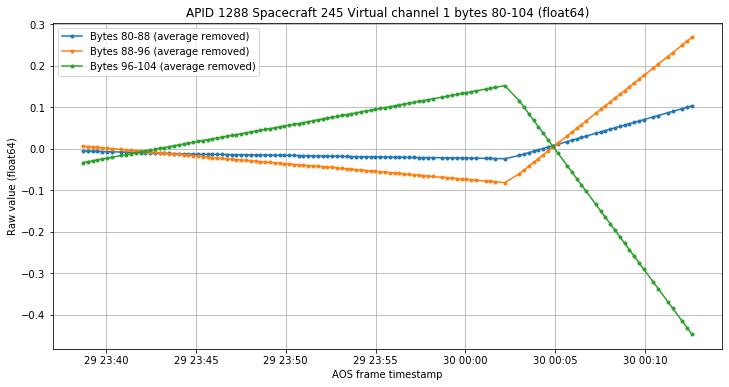

In [55]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps, channels[:,:] - np.average(channels, axis = 0), '.-')
plt.title('APID 1288 Spacecraft 245 Virtual channel 1 bytes 80-104 (float64)')
plt.xlabel('AOS frame timestamp')
plt.ylabel('Raw value (float64)')
plt.legend([f'Bytes {j}-{j+8} (average removed)' for j in range(80,104,8)])
plt.grid();